# Sales Prediction by Using Dataset 2

In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Dataset_2.csv")

In [3]:
df.head()

Invoice_ID       Date   Time  Gender       Location     City Member  \
0   460489604  1/25/2018  16:46    Male     Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  'Water tower'  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  'Water tower'  Chicago     No   
3   487313402  1/22/2018  13:38  Female    'Park lane'   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    'Park lane'   Dallas     No   

    Category  Price  Quantity  Total  Cogs Payment  Rating  
0  Groceries     30         1     30    30    Cash       2  
1    Fashion     35         5    175   175    Card       3  
2   Clothing     57         2    114   114    Cash       5  
3   Sporting     89         4    356   356    Gpay       1  
4      Books     82         5    410   410    Cash       4

In [4]:
def categorize_review(Rating):
    if Rating >= 5.0:
        return 'Excellent'
    elif Rating >= 4.0:
        return 'Good'
    elif Rating >= 3.0:
        return 'Average'
    else:
        return 'Poor'

df['Review'] = df['Rating'].apply(categorize_review)

In [5]:
# Printing information about the dataset
print("Dataset Information:")

# Using df.info() to display basic information about the DataFrame
# This includes the data types, non-null counts, and memory usage
# It's useful for understanding the dataset's structure and identifying missing values

print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Invoice_ID  1000 non-null   int64 
 1   Date        1000 non-null   object
 2   Time        1000 non-null   object
 3   Gender      1000 non-null   object
 4   Location    1000 non-null   object
 5   City        1000 non-null   object
 6   Member      1000 non-null   object
 7   Category    1000 non-null   object
 8   Price       1000 non-null   int64 
 9   Quantity    1000 non-null   int64 
 10  Total       1000 non-null   int64 
 11  Cogs        1000 non-null   int64 
 12  Payment     1000 non-null   object
 13  Rating      1000 non-null   int64 
 14  Review      1000 non-null   object
dtypes: int64(6), object(9)
memory usage: 117.3+ KB
None


# Converting Reviews to Sentimental Analysis

In [6]:
from textblob import TextBlob

# Assuming your DataFrame is named df, and the "Review" column contains the reviews
reviews = df['Review']

# Create a new column 'Sentiment' to store the sentiment polarity
df['Sentiment'] = reviews.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the updated DataFrame with the sentiment column
print(df[['Review', 'Sentiment']])

        Review  Sentiment
0         Poor      -0.40
1      Average      -0.15
2    Excellent       1.00
3         Poor      -0.40
4         Good       0.70
..         ...        ...
995    Average      -0.15
996    Average      -0.15
997    Average      -0.15
998  Excellent       1.00
999    Average      -0.15

[1000 rows x 2 columns]


In [7]:
df

Invoice_ID       Date   Time  Gender       Location     City Member  \
0     460489604  1/25/2018  16:46    Male     Brookfield  NewYork    Yes   
1     471006167  3/19/2018  16:48  Female  'Water tower'  Chicago    Yes   
2     411909258  2/25/2018  13:33    Male  'Water tower'  Chicago     No   
3     487313402  1/22/2018  13:38  Female    'Park lane'   Dallas    Yes   
4     197763430  2/18/2018  15:31  Female    'Park lane'   Dallas     No   
..          ...        ...    ...     ...            ...      ...    ...   
995   818829599  3/26/2018  11:19    Male    'Park lane'   Dallas     No   
996   556589713  2/20/2018  17:17    Male  'Water tower'  Chicago    Yes   
997    82324424   2/6/2018  11:44    Male     Brookfield  NewYork     No   
998   783661702  1/29/2018  15:44  Female     Brookfield  NewYork     No   
999   759171975  1/31/2018  10:13  Female  'Water tower'  Chicago    Yes   

      Category  Price  Quantity  Total  Cogs Payment  Rating     Review  \
0    Groceries     30         1     30    30    Cash       2       Poor   
1      Fashion     35         5    175   175    Card       3    Average   
2     Clothing     57         2    114   114    Cash       5  Excellent   
3     Sporting     89         4    356   356    Gpay       1       Poor   
4        Books     82         5    410   410    Cash       4       Good   
..         ...    ...       ...    ...   ...     ...     ...        ...   
995  Groceries     31         4    124   124    Card       3    Average   
996  Groceries      3         5     15    15    Gpay       3    Average   
997   Clothing     71         5    355   355    Card       3    Average   
998   Clothing     89         7    623   623    Cash       5  Excellent   
999   Clothing     31         7    217   217    Gpay       3    Average   

     Sentiment  
0        -0.40  
1        -0.15  
2         1.00  
3        -0.40  
4         0.70  
..         ...  
995      -0.15  
996      -0.15  
997      -0.15  
998       1.00  
999      -0.15  

[1000 rows x 16 columns]

In [8]:
df.describe().columns

Index(['Invoice_ID', 'Price', 'Quantity', 'Total', 'Cogs', 'Rating',
       'Sentiment'],
      dtype='object')

In [9]:
# Displaying missing values count for each column
print("\nMissing Values:")
print(df.isnull().sum())

# Creating a heatmap using Plotly
fig = px.imshow(df.isnull(), 
                labels=dict(color="Missing Values"),
                color_continuous_scale='viridis',
                title='Missing Values Heatmap')

# Updating layout for better display
fig.update_layout(width=800, height=500, coloraxis_showscale=False)

# Showing the interactive plot
fig.show()



Missing Values:
Invoice_ID    0
Date          0
Time          0
Gender        0
Location      0
City          0
Member        0
Category      0
Price         0
Quantity      0
Total         0
Cogs          0
Payment       0
Rating        0
Review        0
Sentiment     0
dtype: int64


In [10]:
# Displaying unique values count for each categorical column
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
Date: 89 unique values
Time: 506 unique values
Gender: 2 unique values
Location: 3 unique values
City: 3 unique values
Member: 2 unique values
Category: 6 unique values
Payment: 3 unique values
Review: 4 unique values


In [11]:
city_counts = df['City'].value_counts()

In [12]:
# Visualizing City-wise Sales Distribution
city_counts = df['City'].value_counts()
fig_city = px.bar(x=city_counts.index, y=city_counts.values, text=city_counts.values,
                  labels={'x': 'City', 'y': 'Count'},
                  title='City-wise Sales Distribution')
fig_city.update_traces(texttemplate='%{text}', textposition='outside')
fig_city.show()

In [13]:
df['Member'].value_counts()

Yes    501
No     499
Name: Member, dtype: int64

In [14]:
# Visualizing Member Type Distribution
member_counts = df['Member'].value_counts()
fig_member_counts = px.pie(member_counts, names=member_counts.index,
                           title='Member Type Distribution')
fig_member_counts.show()

In [15]:
df['Category'].value_counts()

Sporting     178
Groceries    174
Clothing     170
Books        165
Furniture    160
Fashion      153
Name: Category, dtype: int64

In [16]:
# Visualizing Category wise Sales Distribution
category_counts = df['Category'].value_counts()
fig_category_counts = px.bar(x=category_counts.index, y=category_counts.values, text=category_counts.values,
                          labels={'x': 'Category', 'y': 'Count'},
                          title='Category-wise Sales Distribution')
fig_category_counts.update_traces(texttemplate='%{text}', textposition='outside')
fig_category_counts.show()

In [17]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [18]:
# Visualizing Gender Distribution
gender_counts = df['Gender'].value_counts()
fig_gender = px.pie(gender_counts, names=gender_counts.index, title='Gender Distribution')
fig_gender.show()

In [19]:
df['Location'].value_counts()

Brookfield       340
'Park lane'      332
'Water tower'    328
Name: Location, dtype: int64

In [20]:
# Visualizing Location-wise Sales Distribution
location_counts = df['Location'].value_counts()
fig_location = px.bar(x=location_counts.index, y=location_counts.values, text=location_counts.values,
                    labels={'x': 'Location', 'y': 'Count'},
                    title='Location-wise Sales Distribution')
fig_location.update_traces(texttemplate='%{text}', textposition='outside')
fig_location.show()

In [21]:
print(df.columns)

Index(['Invoice_ID', 'Date', 'Time', 'Gender', 'Location', 'City', 'Member',
       'Category', 'Price', 'Quantity', 'Total', 'Cogs', 'Payment', 'Rating',
       'Review', 'Sentiment'],
      dtype='object')


In [22]:
# Drop irrelevant columns
df = df.drop(["Invoice_ID", "Date", "Time","Review"], axis=1)

# Handling missing values
# Impute numerical features with mean and categorical features with mode
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [23]:
# Convert categorical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['Member'] = label_encoder.fit_transform(df['Member'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Payment'] = label_encoder.fit_transform(df['Payment'])


In [24]:
# Display the preprocessed data
print("Preprocessed Data Preview:")
df.head()

Preprocessed Data Preview:


Gender  Location  City  Member  Category  Price  Quantity  Total  Cogs  \
0       1         2     2       1         4     30         1     30    30   
1       0         1     0       1         2     35         5    175   175   
2       1         1     0       0         1     57         2    114   114   
3       0         0     1       1         5     89         4    356   356   
4       0         0     1       0         0     82         5    410   410   

   Payment  Rating  Sentiment  
0        1       2      -0.40  
1        0       3      -0.15  
2        1       5       1.00  
3        2       1      -0.40  
4        1       4       0.70

In [25]:
# Scatter plot between "price" and "Total" using Plotly
scatter_plot = px.scatter(df, x="Price", y="Total", title="Scatter Plot: Price vs. Total Sales",
                          labels={"Price": "Price", "Total": "Total Sales"})
scatter_plot.show()

In [26]:
# Scatter plot between "Quantity" and "Total" using Plotly
scatter_plot = px.scatter(df, x="Quantity", y="Total", title="Scatter Plot: Quantity vs. Total Sales",
                          labels={"Quantity": "Quantity", "Total": "Total Sales"})
scatter_plot.show()

In [27]:
# Specify the numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64']).columns

# Function to detect and handle outliers using IQR
def handle_outliers(dataframe, columns):
    for column in columns:
        # Calculate the IQR (Interquartile Range)
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and handle outliers by capping them at the bounds
        dataframe[column] = dataframe[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply outlier detection and handling
handle_outliers(df, numerical_columns)

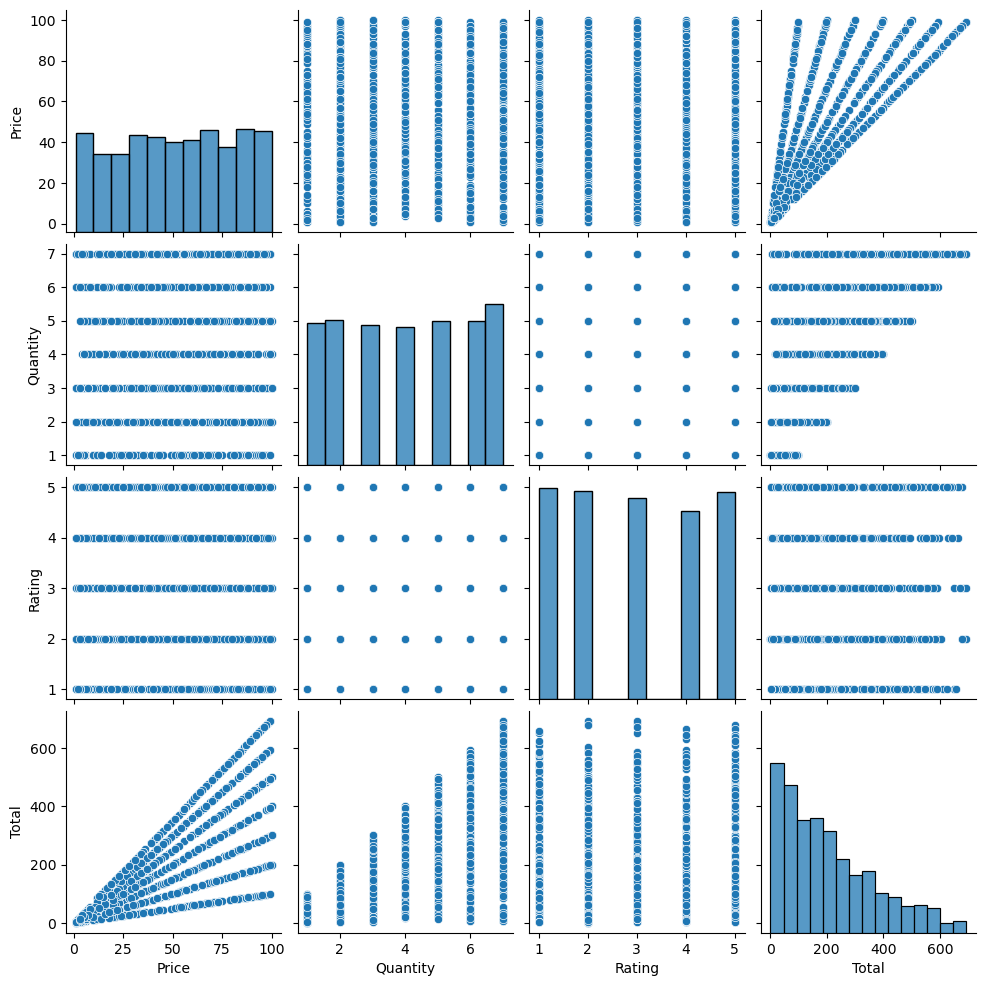

In [28]:
# Visualizing the distribution of numerical variables using a pair plot
# The seaborn library's pairplot is used to create scatterplots for numerical variables
sns.pairplot(df[['Price', 'Quantity', 'Rating', 'Total']])
plt.show()

In [29]:
df.corr()

Gender  Location      City    Member  Category     Price  \
Gender     1.000000  0.009779 -0.073390  0.012004  0.021431  0.009213   
Location   0.009779  1.000000  0.507401 -0.004899 -0.002352 -0.001135   
City      -0.073390  0.507401  1.000000 -0.019608 -0.053393  0.038349   
Member     0.012004 -0.004899 -0.019608  1.000000  0.006308  0.026015   
Category   0.021431 -0.002352 -0.053393  0.006308  1.000000 -0.020132   
Price      0.009213 -0.001135  0.038349  0.026015 -0.020132  1.000000   
Quantity  -0.034974  0.018978  0.031572  0.012277 -0.036492  0.005539   
Total     -0.028394  0.000344  0.032764  0.041575 -0.039532  0.696208   
Cogs      -0.028394  0.000344  0.032764  0.041575 -0.039532  0.696208   
Payment   -0.019688  0.026726  0.020553 -0.069286  0.007550 -0.026975   
Rating    -0.039274 -0.069040 -0.096588 -0.029387 -0.013695  0.032176   
Sentiment -0.048662 -0.068357 -0.101965 -0.023933 -0.017755  0.035298   

           Quantity     Total      Cogs   Payment    Rating  Sentiment  
Gender    -0.034974 -0.028394 -0.028394 -0.019688 -0.039274  -0.048662  
Location   0.018978  0.000344  0.000344  0.026726 -0.069040  -0.068357  
City       0.031572  0.032764  0.032764  0.020553 -0.096588  -0.101965  
Member     0.012277  0.041575  0.041575 -0.069286 -0.029387  -0.023933  
Category  -0.036492 -0.039532 -0.039532  0.007550 -0.013695  -0.017755  
Price      0.005539  0.696208  0.696208 -0.026975  0.032176   0.035298  
Quantity   1.000000  0.626451  0.626451  0.037800  0.058302   0.058613  
Total      0.626451  1.000000  1.000000 -0.003343  0.070696   0.067565  
Cogs       0.626451  1.000000  1.000000 -0.003343  0.070696   0.067565  
Payment    0.037800 -0.003343 -0.003343  1.000000 -0.012163  -0.010426  
Rating     0.058302  0.070696  0.070696 -0.012163  1.000000   0.940731  
Sentiment  0.058613  0.067565  0.067565 -0.010426  0.940731   1.000000

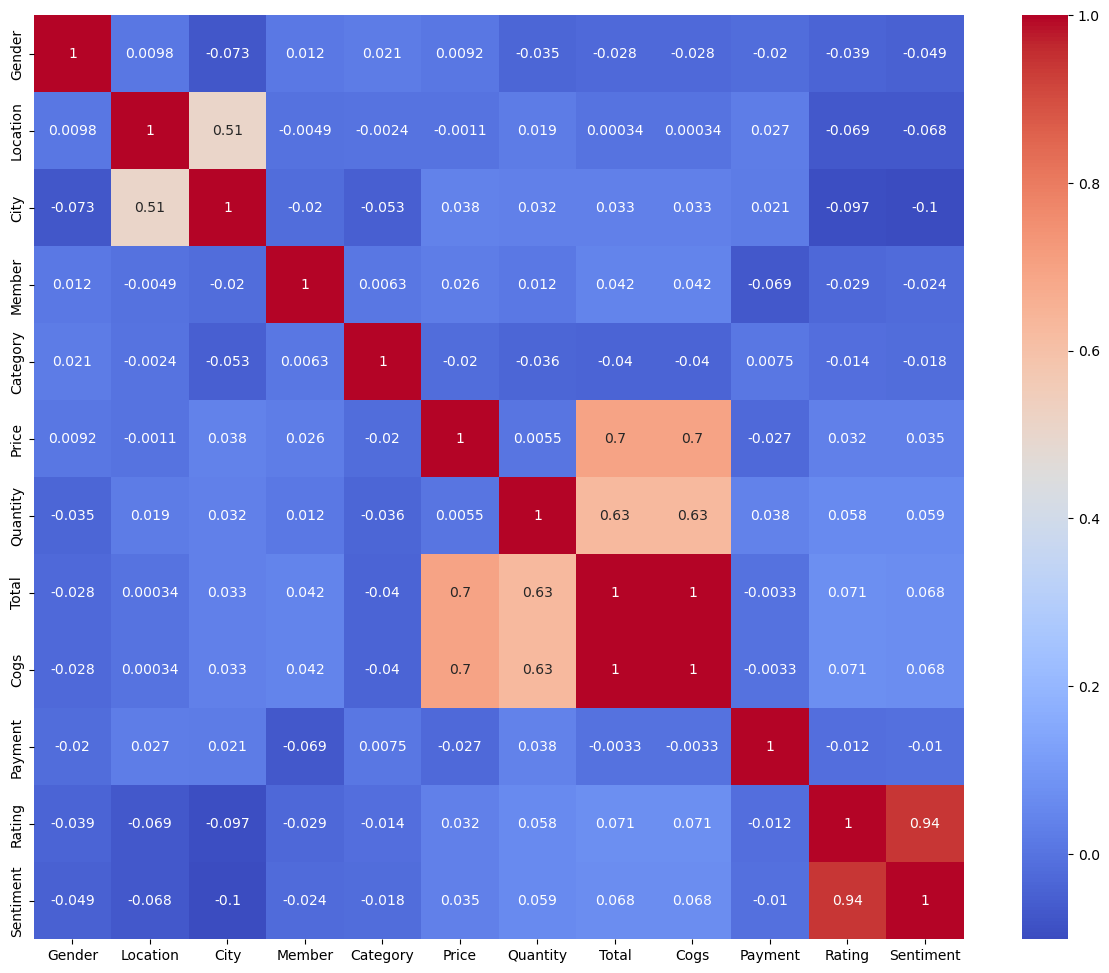

In [30]:
# Visualizing the correlation matrix using a heatmap
# The seaborn library's heatmap is used with correlation values annotated
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(15, 12))  # Adjust the values as needed

# Create the heatmap with annotated correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

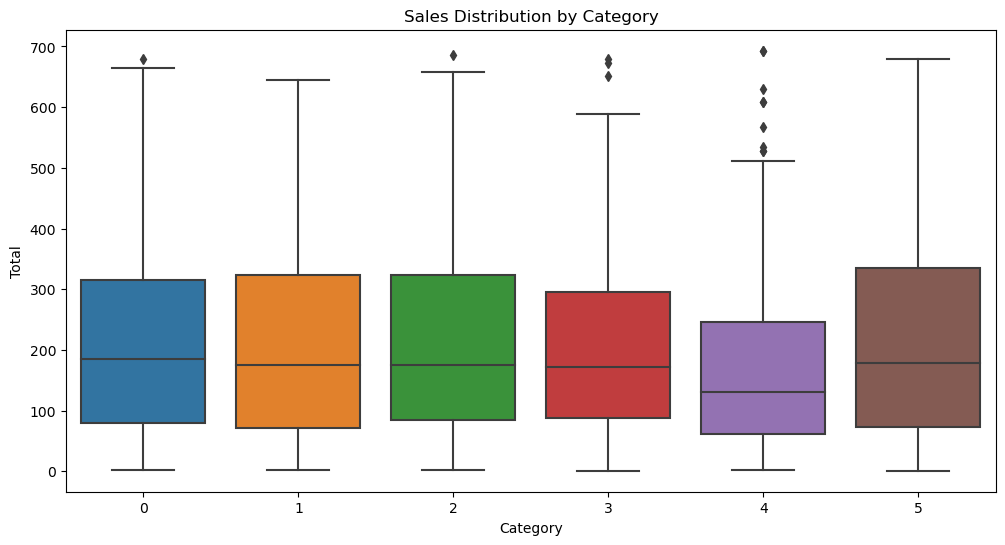

In [31]:
# Visualizing sales distribution by Category using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Total", data=df)
plt.title("Sales Distribution by Category")
plt.show()


In [32]:
# Distribution of Numerical Features
fig_dist_numerical = px.histogram(df, x="Price", title="Distribution of Price")
fig_dist_numerical.update_layout(bargap=0.1)
fig_dist_numerical.update_xaxes(title_text="Price")
fig_dist_numerical.update_yaxes(title_text="Count")
fig_dist_numerical.show()

In [33]:
# Correlation Analysis - Scatter Matrix
fig_scatter_matrix = px.scatter_matrix(df, dimensions=["Price", "Quantity", "Rating", "Total"],
                                      title="Scatter Matrix of Numerical Features")

# Manually set diagonal_visible to False for each subplot
for i in range(len(fig_scatter_matrix.data)):
    fig_scatter_matrix.update_traces(diagonal_visible=False, selector=dict(type='scatter', row=i, col=i))

fig_scatter_matrix.show()

# Model Building Lasso and Ridge Regression

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time

# Define features (X) and target variable (y)
# Hybrid the models with Sentimental analysis column
X = df.drop("Total", axis=1)
X['Sentiment'] = df['Sentiment']
y = df["Total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling - Lasso Regression
lasso_model = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)

# Training time for Lasso Regression
start_time = time.time()
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_training_time = time.time() - start_time

# Testing time for Lasso Regression
start_time = time.time()
lasso_pred = lasso_best.predict(X_test)
lasso_testing_time = time.time() - start_time

# Modeling - Ridge Regression
ridge_model = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)

# Training time for Ridge Regression
start_time = time.time()
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_training_time = time.time() - start_time

# Testing time for Ridge Regression
start_time = time.time()
ridge_pred = ridge_best.predict(X_test)
ridge_testing_time = time.time() - start_time

# Evaluate models
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_mae = mean_absolute_error(y_test, lasso_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression MAE: {lasso_mae}")
print(f"Lasso Regression Training Time: {lasso_training_time} seconds")
print(f"Lasso Regression Testing Time: {lasso_testing_time} seconds")
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Ridge Regression MAE: {ridge_mae}")
print(f"Ridge Regression Training Time: {ridge_training_time} seconds")
print(f"Ridge Regression Testing Time: {ridge_testing_time} seconds")

Lasso Regression RMSE: 0.0003160410482472506
Lasso Regression MAE: 0.0002550297756469444
Lasso Regression Training Time: 0.04873394966125488 seconds
Lasso Regression Testing Time: 0.0003581047058105469 seconds
Ridge Regression RMSE: 2.429760316019329e-08
Ridge Regression MAE: 1.857718896491889e-08
Ridge Regression Training Time: 0.0364229679107666 seconds
Ridge Regression Testing Time: 0.0003039836883544922 seconds


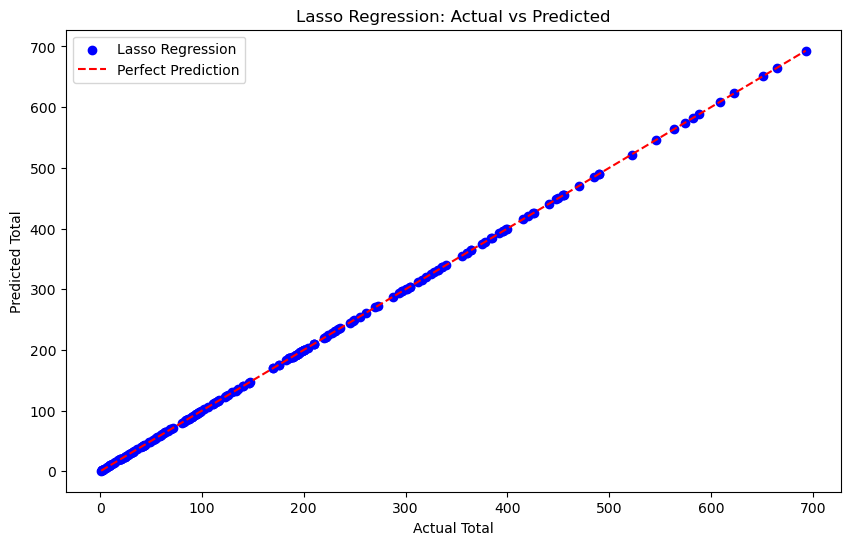

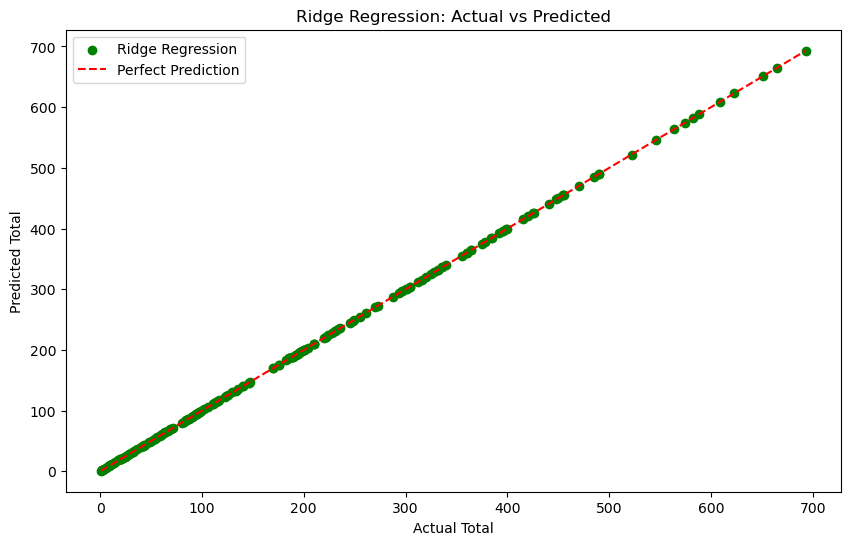

In [35]:
# Plotting Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='blue', label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.legend()
plt.show()

# Plotting Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='green', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.legend()
plt.show()

# Neural Network

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time

# Define features (X) and target variable (y)
X = df.drop("Total", axis=1)
X['Sentiment'] = df['Sentiment']
y = df["Total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Sequential model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training time for Neural Network
start_time = time.time()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
nn_training_time = time.time() - start_time

# Testing time for Neural Network
start_time = time.time()
nn_pred = model.predict(X_test_scaled).flatten()
nn_testing_time = time.time() - start_time

# Evaluate the model
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_mae = mean_absolute_error(y_test, nn_pred)

print(f"Neural Network RMSE: {nn_rmse}")
print(f"Neural Network MAE: {nn_mae}")
print(f"Neural Network Training Time: {nn_training_time} seconds")
print(f"Neural Network Testing Time: {nn_testing_time} seconds")

7/7 [==============================] - 0s 469us/step
Neural Network RMSE: 24.83630521193582
Neural Network MAE: 19.946934275627136
Neural Network Training Time: 1.0506041049957275 seconds
Neural Network Testing Time: 0.05163311958312988 seconds


# Important Feature

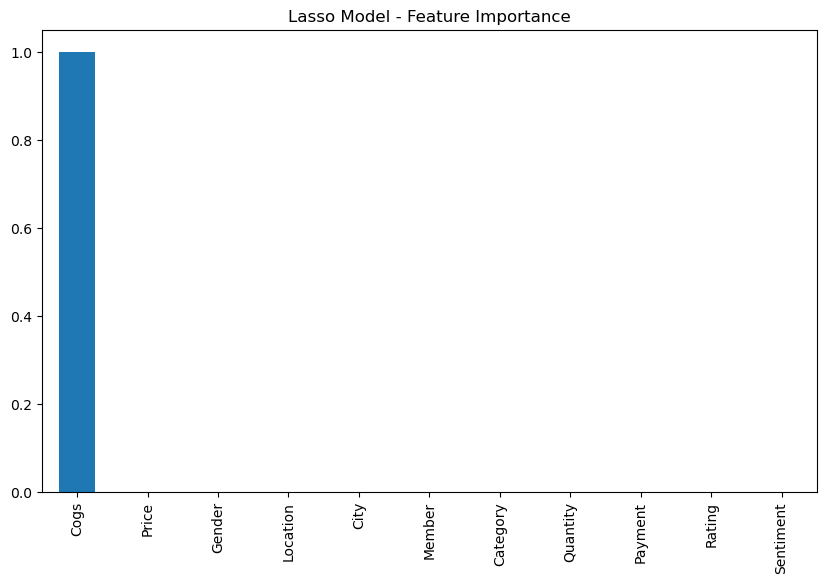

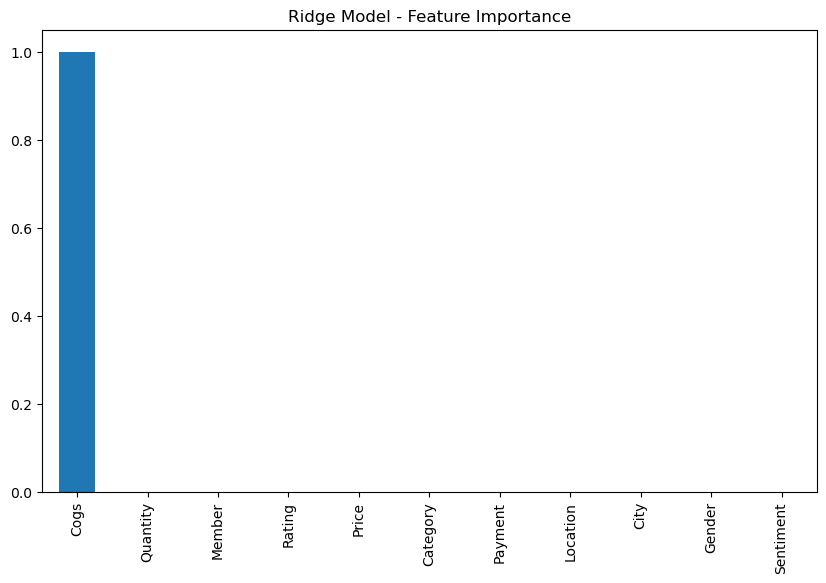

In [37]:
def plot_feature_importance(model, feature_names, title):
    importance = model.coef_  
    feature_importance = pd.Series(importance, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(title)
    plt.show()

plot_feature_importance(lasso_best, X.columns, 'Lasso Model - Feature Importance')
plot_feature_importance(ridge_best, X.columns, 'Ridge Model - Feature Importance')

# Hyperparameter Tuning with Optuna

In [38]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import time


# Lasso Regression
def lasso_objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lasso = Lasso(alpha=trial.suggest_loguniform('alpha', 1e-5, 1e2))
    start_time = time.time()
    lasso.fit(X_train, y_train)
    lasso_training_time = time.time() - start_time
    y_pred = lasso.predict(X_test)
    lasso_testing_time = time.time() - start_time
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae, lasso_training_time, lasso_testing_time

# Ridge Regression
def ridge_objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ridge = Ridge(alpha=trial.suggest_loguniform('alpha', 1e-5, 1e2))
    start_time = time.time()
    ridge.fit(X_train, y_train)
    ridge_training_time = time.time() - start_time
    y_pred = ridge.predict(X_test)
    ridge_testing_time = time.time() - start_time
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae, ridge_training_time, ridge_testing_time

# Define the Optuna objective function
def nn_objective(trial):
    start_time = time.time()
    # Hyperparameters to be optimized
    n_units_1 = trial.suggest_int('n_units_1', 10, 100)
    n_units_2 = trial.suggest_int('n_units_2', 10, 100)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Build the model
    model = Sequential()
    model.add(Dense(n_units_1, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(n_units_2, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    nn_training_time = time.time() - start_time

    # Make predictions on the test set
    start_time = time.time()
    nn_pred = model.predict(X_test_scaled).flatten()
    nn_testing_time = time.time() - start_time

    # Evaluate the model
    nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
    nn_mae = mean_absolute_error(y_test, nn_pred)

    return nn_rmse, nn_mae, nn_training_time, nn_testing_time


# Create the Optuna study for Lasso
lasso_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
lasso_study.optimize(lasso_objective, n_trials=100)
best_lasso_trials = lasso_study.best_trials  # Use best_trials instead of best_params
best_lasso_params = best_lasso_trials[0].params
best_lasso_alpha = best_lasso_params['alpha']
lasso_rmse, lasso_mae, lasso_training_time, lasso_testing_time = best_lasso_trials[0].values

# Create the Optuna study for Ridge
ridge_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
ridge_study.optimize(ridge_objective, n_trials=100)
best_ridge_trials = ridge_study.best_trials
best_ridge_params = best_ridge_trials[0].params
best_ridge_alpha = best_ridge_params['alpha']
ridge_rmse, ridge_mae, ridge_training_time, ridge_testing_time = best_ridge_trials[0].values

# Create the Optuna study for Neural Network
nn_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
nn_study.optimize(nn_objective, n_trials=100)
best_nn_trials = nn_study.best_trials
best_nn_params = best_nn_trials[0].params
best_nn_rmse, best_nn_mae, nn_training_time, nn_testing_time = best_nn_trials[0].values

# Print or use the extracted values as needed
print("Best Lasso Params:", best_lasso_params)
print("Best Lasso Alpha:", best_lasso_alpha)
print("Lasso RMSE:", lasso_rmse)
print("Lasso MAE:", lasso_mae)
print("Lasso Training Time:", lasso_training_time)
print("Lasso Testing Time:", lasso_testing_time)

print("Best Ridge Params:", best_ridge_params)
print("Best Ridge Alpha:", best_ridge_alpha)
print("Ridge RMSE:", ridge_rmse)
print("Ridge MAE:", ridge_mae)
print("Ridge Training Time:", ridge_training_time)
print("Ridge Testing Time:", ridge_testing_time)

print("Best Neural Network Params:", best_nn_params)
print("Best Neural Network RMSE:", best_nn_rmse)
print("Best Neural Network MAE:", best_nn_mae)
print("Neural Network Training Time:", nn_training_time)
print("Neural Network Testing Time:", nn_testing_time)


[I 2023-12-30 08:37:30,535] A new study created in memory with name: no-name-0fbcb25b-f526-4b0e-ae1c-7c1d963a90d2
[I 2023-12-30 08:37:30,555] Trial 0 finished with values: [0.00027112077098003325, 0.00020283838213158823, 0.008912801742553711, 0.010336875915527344] and parameters: {'alpha': 3.041620465335698e-05}. 
[I 2023-12-30 08:37:30,568] Trial 1 finished with values: [0.0004731855497692896, 0.00039109794743783064, 0.0048639774322509766, 0.007658958435058594] and parameters: {'alpha': 0.07856494667601356}. 
[I 2023-12-30 08:37:30,580] Trial 2 finished with values: [0.0012795349305857401, 0.001031473573765692, 0.006132841110229492, 0.007370948791503906] and parameters: {'alpha': 0.007185077454530179}. 
[I 2023-12-30 08:37:30,586] Trial 3 finished with values: [0.0008910530583021465, 0.0007364743541527651, 0.0021581649780273438, 0.0029671192169189453] and parameters: {'alpha': 0.14794521101207792}. 
[I 2023-12-30 08:37:30,589] Trial 4 finished with values: [0.0006692241218152119, 0.00

[I 2023-12-30 08:37:30,731] Trial 41 finished with values: [0.1367312294823807, 0.11301127692435115, 0.0010349750518798828, 0.0014128684997558594] and parameters: {'alpha': 22.702049456436175}. 
[I 2023-12-30 08:37:30,734] Trial 42 finished with values: [0.0005693198195286347, 0.0004238801036695372, 0.0013909339904785156, 0.0017008781433105469] and parameters: {'alpha': 0.00020410486539563895}. 
[I 2023-12-30 08:37:30,737] Trial 43 finished with values: [0.0014730700416094994, 0.0012175238022176993, 0.0009160041809082031, 0.0012238025665283203] and parameters: {'alpha': 0.2445798890571332}. 
[I 2023-12-30 08:37:30,739] Trial 44 finished with values: [0.00048389188001915116, 0.00035859245663776186, 0.0012371540069580078, 0.0015192031860351562] and parameters: {'alpha': 0.0002760710934851631}. 
[I 2023-12-30 08:37:30,741] Trial 45 finished with values: [0.0006016332999136733, 0.00048515888925077856, 0.0011262893676757812, 0.0014312267303466797] and parameters: {'alpha': 0.002909089525479

[I 2023-12-30 08:37:30,842] Trial 82 finished with values: [0.2455433293897667, 0.20294679788694267, 0.0006902217864990234, 0.0009698867797851562] and parameters: {'alpha': 40.76857078376679}. 
[I 2023-12-30 08:37:30,845] Trial 83 finished with values: [0.00021006596750509132, 0.00015724874470549488, 0.0014400482177734375, 0.0017600059509277344] and parameters: {'alpha': 2.498748765041911e-05}. 
[I 2023-12-30 08:37:30,847] Trial 84 finished with values: [0.0004645998859756762, 0.00034396828818673007, 0.0014269351959228516, 0.0017080307006835938] and parameters: {'alpha': 0.000293123312872143}. 
[I 2023-12-30 08:37:30,850] Trial 85 finished with values: [0.00029101767260001764, 0.00023462249883191344, 0.001310110092163086, 0.0015931129455566406] and parameters: {'alpha': 0.0015668864625299126}. 
[I 2023-12-30 08:37:30,852] Trial 86 finished with values: [0.04021539062807785, 0.03323887793663255, 0.0007979869842529297, 0.0010721683502197266] and parameters: {'alpha': 6.677127020685671}. 

[I 2023-12-30 08:37:30,938] Trial 23 finished with values: [5.177583327084592e-07, 3.958619361421611e-07, 0.0006079673767089844, 0.0008778572082519531] and parameters: {'alpha': 0.021309617256911117}. 
[I 2023-12-30 08:37:30,940] Trial 24 finished with values: [1.1708784264752531e-05, 8.952244741267102e-06, 0.000579833984375, 0.0008718967437744141] and parameters: {'alpha': 0.48216620587642417}. 
[I 2023-12-30 08:37:30,942] Trial 25 finished with values: [1.3458557100936176e-05, 1.0290092348413938e-05, 0.0005960464477539062, 0.0008599758148193359] and parameters: {'alpha': 0.5542686343699583}. 
[I 2023-12-30 08:37:30,944] Trial 26 finished with values: [0.0006638518232743462, 0.0005074616447717872, 0.0006101131439208984, 0.0008800029754638672] and parameters: {'alpha': 28.160933328999377}. 
[I 2023-12-30 08:37:30,946] Trial 27 finished with values: [7.319729594909764e-07, 5.59643839511681e-07, 0.0008311271667480469, 0.0011279582977294922] and parameters: {'alpha': 0.03012646849511022}.

[I 2023-12-30 08:37:31,023] Trial 64 finished with values: [1.493961402410917e-08, 1.1422361742008391e-08, 0.0005741119384765625, 0.0008461475372314453] and parameters: {'alpha': 0.0006148559606554018}. 
[I 2023-12-30 08:37:31,025] Trial 65 finished with values: [4.871690997653069e-10, 3.724701835849942e-10, 0.0005619525909423828, 0.000885009765625] and parameters: {'alpha': 2.003770808843696e-05}. 
[I 2023-12-30 08:37:31,027] Trial 66 finished with values: [1.886832264705024e-07, 1.4426130667932746e-07, 0.0006310939788818359, 0.0009069442749023438] and parameters: {'alpha': 0.00776559996911674}. 
[I 2023-12-30 08:37:31,029] Trial 67 finished with values: [1.1760074220651818e-06, 8.991390284818213e-07, 0.0006399154663085938, 0.000911712646484375] and parameters: {'alpha': 0.04840304147102485}. 
[I 2023-12-30 08:37:31,031] Trial 68 finished with values: [5.01695189764688e-10, 3.8357782505826775e-10, 0.0005698204040527344, 0.00084686279296875] and parameters: {'alpha': 2.0644969016328645

7/7 [==============================] - 0s 408us/step


[I 2023-12-30 08:37:32,220] Trial 0 finished with values: [20.57682739772458, 15.988454548716545, 1.0739479064941406, 0.032888174057006836] and parameters: {'n_units_1': 34, 'n_units_2': 20, 'learning_rate': 0.0034283184153768138}. 


7/7 [==============================] - 0s 411us/step


[I 2023-12-30 08:37:33,203] Trial 1 finished with values: [26.25498543860643, 21.123369097709656, 0.9493551254272461, 0.032852888107299805] and parameters: {'n_units_1': 89, 'n_units_2': 37, 'learning_rate': 0.00046836517608171756}. 


7/7 [==============================] - 0s 434us/step


[I 2023-12-30 08:37:34,255] Trial 2 finished with values: [28.95896795541143, 22.73242043018341, 1.0152268409729004, 0.035894155502319336] and parameters: {'n_units_1': 97, 'n_units_2': 91, 'learning_rate': 0.0002708120975454904}. 


7/7 [==============================] - 0s 402us/step


[I 2023-12-30 08:37:35,312] Trial 3 finished with values: [158.76408531448396, 118.42661170482636, 1.0225939750671387, 0.03356528282165527] and parameters: {'n_units_1': 21, 'n_units_2': 54, 'learning_rate': 0.00021897985588264712}. 


7/7 [==============================] - 0s 391us/step


[I 2023-12-30 08:37:36,480] Trial 4 finished with values: [256.6533852695953, 196.6611247125268, 1.1350162029266357, 0.03251481056213379] and parameters: {'n_units_1': 61, 'n_units_2': 45, 'learning_rate': 1.1095932844932462e-05}. 


7/7 [==============================] - 0s 408us/step


[I 2023-12-30 08:37:37,454] Trial 5 finished with values: [12.500753447437383, 9.440492966175078, 0.9396982192993164, 0.033247947692871094] and parameters: {'n_units_1': 55, 'n_units_2': 17, 'learning_rate': 0.005763760245276177}. 


7/7 [==============================] - 0s 431us/step


[I 2023-12-30 08:37:38,484] Trial 6 finished with values: [23.427621886294236, 18.31968725681305, 0.9951488971710205, 0.03431415557861328] and parameters: {'n_units_1': 39, 'n_units_2': 82, 'learning_rate': 0.0014446162832356326}. 


7/7 [==============================] - 0s 439us/step


[I 2023-12-30 08:37:39,519] Trial 7 finished with values: [23.601519136940247, 18.85914514541626, 0.9986522197723389, 0.03575778007507324] and parameters: {'n_units_1': 51, 'n_units_2': 59, 'learning_rate': 0.0012357927752555504}. 


7/7 [==============================] - 0s 423us/step


[I 2023-12-30 08:37:40,521] Trial 8 finished with values: [254.55030073878072, 194.68713974833489, 0.9672188758850098, 0.033303022384643555] and parameters: {'n_units_1': 26, 'n_units_2': 16, 'learning_rate': 6.0407349298132484e-05}. 


7/7 [==============================] - 0s 422us/step


[I 2023-12-30 08:37:41,566] Trial 9 finished with values: [33.29654784173698, 26.9124107170105, 1.0121071338653564, 0.03256988525390625] and parameters: {'n_units_1': 98, 'n_units_2': 85, 'learning_rate': 0.0002132137073999671}. 


7/7 [==============================] - 0s 414us/step


[I 2023-12-30 08:37:42,583] Trial 10 finished with values: [256.3205664027579, 196.47118757888674, 0.9828660488128662, 0.03291010856628418] and parameters: {'n_units_1': 90, 'n_units_2': 71, 'learning_rate': 1.2475675197986816e-05}. 


7/7 [==============================] - 0s 436us/step


[I 2023-12-30 08:37:43,711] Trial 11 finished with values: [25.785316791100932, 20.643176469802857, 1.0925092697143555, 0.03513193130493164] and parameters: {'n_units_1': 94, 'n_units_2': 32, 'learning_rate': 0.0005988013596080852}. 


7/7 [==============================] - 0s 439us/step


[I 2023-12-30 08:37:44,809] Trial 12 finished with values: [17.29189350397901, 13.578830122500658, 1.0623807907104492, 0.03507804870605469] and parameters: {'n_units_1': 18, 'n_units_2': 30, 'learning_rate': 0.005517524099004246}. 


7/7 [==============================] - 0s 470us/step


[I 2023-12-30 08:37:45,877] Trial 13 finished with values: [31.27924068368931, 24.881707983016966, 1.028681993484497, 0.03853797912597656] and parameters: {'n_units_1': 90, 'n_units_2': 94, 'learning_rate': 0.0002459046535125254}. 


7/7 [==============================] - 0s 508us/step


[I 2023-12-30 08:37:47,152] Trial 14 finished with values: [195.70974121428998, 146.33288548231124, 1.2349269390106201, 0.03815197944641113] and parameters: {'n_units_1': 98, 'n_units_2': 11, 'learning_rate': 0.00018268269219371948}. 


7/7 [==============================] - 0s 743us/step


[I 2023-12-30 08:37:48,342] Trial 15 finished with values: [28.203895263774545, 22.931021814346312, 1.1486058235168457, 0.040015220642089844] and parameters: {'n_units_1': 53, 'n_units_2': 99, 'learning_rate': 0.00034786854952637095}. 


7/7 [==============================] - 0s 475us/step


[I 2023-12-30 08:37:49,530] Trial 16 finished with values: [233.93982676238676, 177.64198811888696, 1.1449589729309082, 0.04214286804199219] and parameters: {'n_units_1': 25, 'n_units_2': 30, 'learning_rate': 0.00013564164945695082}. 


7/7 [==============================] - 0s 422us/step


[I 2023-12-30 08:37:50,576] Trial 17 finished with values: [252.70668922203077, 192.5131836259365, 1.0125679969787598, 0.03276801109313965] and parameters: {'n_units_1': 88, 'n_units_2': 74, 'learning_rate': 2.987565810653764e-05}. 


7/7 [==============================] - 0s 398us/step


[I 2023-12-30 08:37:51,608] Trial 18 finished with values: [256.1079504253558, 196.2945141386986, 0.998460054397583, 0.03290104866027832] and parameters: {'n_units_1': 99, 'n_units_2': 82, 'learning_rate': 1.0149229973844571e-05}. 


7/7 [==============================] - 0s 414us/step


[I 2023-12-30 08:37:52,626] Trial 19 finished with values: [26.094916746280415, 21.00233639717102, 0.9843189716339111, 0.03300309181213379] and parameters: {'n_units_1': 82, 'n_units_2': 65, 'learning_rate': 0.0005967625096276487}. 


7/7 [==============================] - 0s 407us/step


[I 2023-12-30 08:37:53,612] Trial 20 finished with values: [248.1659510808138, 188.81321439504623, 0.9517810344696045, 0.033445119857788086] and parameters: {'n_units_1': 16, 'n_units_2': 60, 'learning_rate': 8.525560402665218e-05}. 


7/7 [==============================] - 0s 428us/step


[I 2023-12-30 08:37:54,583] Trial 21 finished with values: [27.765057313325222, 21.63554072380066, 0.9370651245117188, 0.03390812873840332] and parameters: {'n_units_1': 37, 'n_units_2': 28, 'learning_rate': 0.0005182791382833605}. 


7/7 [==============================] - 0s 421us/step


[I 2023-12-30 08:37:55,590] Trial 22 finished with values: [22.950685200584388, 18.297038474082946, 0.9719600677490234, 0.033873796463012695] and parameters: {'n_units_1': 88, 'n_units_2': 32, 'learning_rate': 0.0011177677276115474}. 


7/7 [==============================] - 0s 414us/step


[I 2023-12-30 08:37:56,852] Trial 23 finished with values: [254.88664606890373, 194.92009953320027, 1.0055100917816162, 0.25573110580444336] and parameters: {'n_units_1': 62, 'n_units_2': 97, 'learning_rate': 1.923122380778688e-05}. 


7/7 [==============================] - 0s 413us/step


[I 2023-12-30 08:37:57,840] Trial 24 finished with values: [255.24269307471522, 195.2640237826109, 0.9547750949859619, 0.03270101547241211] and parameters: {'n_units_1': 15, 'n_units_2': 85, 'learning_rate': 4.410045186080278e-05}. 


7/7 [==============================] - 0s 426us/step


[I 2023-12-30 08:37:58,880] Trial 25 finished with values: [222.25749636853297, 165.99113807201385, 1.0059587955474854, 0.03286242485046387] and parameters: {'n_units_1': 89, 'n_units_2': 54, 'learning_rate': 8.896616984880603e-05}. 


7/7 [==============================] - 0s 437us/step


[I 2023-12-30 08:37:59,968] Trial 26 finished with values: [13.028427748102123, 10.40209966659546, 1.0534160137176514, 0.034422874450683594] and parameters: {'n_units_1': 90, 'n_units_2': 94, 'learning_rate': 0.0023532420389803946}. 


7/7 [==============================] - 0s 404us/step


[I 2023-12-30 08:38:00,965] Trial 27 finished with values: [256.9771669758444, 197.22432331874035, 0.962627649307251, 0.03308892250061035] and parameters: {'n_units_1': 58, 'n_units_2': 39, 'learning_rate': 1.1616461801153844e-05}. 


7/7 [==============================] - 0s 380us/step


[I 2023-12-30 08:38:01,956] Trial 28 finished with values: [24.99669031587824, 19.773269486427306, 0.9573159217834473, 0.03303194046020508] and parameters: {'n_units_1': 36, 'n_units_2': 54, 'learning_rate': 0.0012211235227110968}. 


7/7 [==============================] - 0s 401us/step


[I 2023-12-30 08:38:02,941] Trial 29 finished with values: [16.82578469386724, 13.129275195896625, 0.9505598545074463, 0.03373003005981445] and parameters: {'n_units_1': 29, 'n_units_2': 78, 'learning_rate': 0.0036313605634899025}. 


7/7 [==============================] - 0s 409us/step


[I 2023-12-30 08:38:03,927] Trial 30 finished with values: [21.780666247720692, 16.938395560979842, 0.9523389339447021, 0.033296823501586914] and parameters: {'n_units_1': 22, 'n_units_2': 59, 'learning_rate': 0.002615809585269296}. 


7/7 [==============================] - 0s 419us/step


[I 2023-12-30 08:38:04,910] Trial 31 finished with values: [257.3119227700339, 197.6980585844349, 0.9485430717468262, 0.032901763916015625] and parameters: {'n_units_1': 17, 'n_units_2': 56, 'learning_rate': 1.3477553999339411e-05}. 


7/7 [==============================] - 0s 416us/step


[I 2023-12-30 08:38:05,919] Trial 32 finished with values: [5.60303720862417, 4.602137795686722, 0.9751570224761963, 0.03313803672790527] and parameters: {'n_units_1': 59, 'n_units_2': 85, 'learning_rate': 0.007883228523520915}. 


7/7 [==============================] - 0s 435us/step


[I 2023-12-30 08:38:06,903] Trial 33 finished with values: [255.87346777096212, 195.72415079772472, 0.9497640132904053, 0.033351898193359375] and parameters: {'n_units_1': 18, 'n_units_2': 96, 'learning_rate': 3.885426611466786e-05}. 


7/7 [==============================] - 0s 401us/step


[I 2023-12-30 08:38:07,899] Trial 34 finished with values: [67.75845810503671, 54.8109845495224, 0.9623298645019531, 0.033616065979003906] and parameters: {'n_units_1': 39, 'n_units_2': 100, 'learning_rate': 0.00021446567259623823}. 


7/7 [==============================] - 0s 419us/step


[I 2023-12-30 08:38:08,877] Trial 35 finished with values: [254.47699456372675, 194.7486815607548, 0.9441900253295898, 0.03313422203063965] and parameters: {'n_units_1': 41, 'n_units_2': 26, 'learning_rate': 3.578567217170384e-05}. 


7/7 [==============================] - 0s 398us/step


[I 2023-12-30 08:38:09,854] Trial 36 finished with values: [19.35090091915837, 15.378992624282837, 0.9434788227081299, 0.03285384178161621] and parameters: {'n_units_1': 12, 'n_units_2': 75, 'learning_rate': 0.004953725804965506}. 


7/7 [==============================] - 0s 411us/step


[I 2023-12-30 08:38:10,857] Trial 37 finished with values: [30.86969899717728, 25.196697659492493, 0.9682459831237793, 0.03373384475708008] and parameters: {'n_units_1': 91, 'n_units_2': 32, 'learning_rate': 0.00029766109299141514}. 


7/7 [==============================] - 0s 434us/step


[I 2023-12-30 08:38:11,862] Trial 38 finished with values: [21.462223974019647, 16.907105236053468, 0.970566987991333, 0.03368091583251953] and parameters: {'n_units_1': 29, 'n_units_2': 67, 'learning_rate': 0.0018388284115827289}. 


7/7 [==============================] - 0s 437us/step


[I 2023-12-30 08:38:12,869] Trial 39 finished with values: [29.434111916663937, 23.71120970249176, 0.9714279174804688, 0.03467702865600586] and parameters: {'n_units_1': 35, 'n_units_2': 97, 'learning_rate': 0.0004794890163236311}. 


7/7 [==============================] - 0s 404us/step


[I 2023-12-30 08:38:13,860] Trial 40 finished with values: [257.64168911767865, 197.99237778288312, 0.9568440914154053, 0.03304600715637207] and parameters: {'n_units_1': 29, 'n_units_2': 15, 'learning_rate': 1.2599476246244837e-05}. 


7/7 [==============================] - 0s 426us/step


[I 2023-12-30 08:38:14,899] Trial 41 finished with values: [137.82428498483674, 100.52259609222412, 1.0036537647247314, 0.034156084060668945] and parameters: {'n_units_1': 68, 'n_units_2': 44, 'learning_rate': 0.00018541080138285496}. 


7/7 [==============================] - 0s 398us/step


[I 2023-12-30 08:38:15,950] Trial 42 finished with values: [190.72481327740275, 139.34728578090667, 1.0174047946929932, 0.033467769622802734] and parameters: {'n_units_1': 21, 'n_units_2': 99, 'learning_rate': 0.0001615164837396604}. 


7/7 [==============================] - 0s 391us/step


[I 2023-12-30 08:38:16,949] Trial 43 finished with values: [238.745746326616, 180.8513373374939, 0.9646100997924805, 0.03292989730834961] and parameters: {'n_units_1': 52, 'n_units_2': 10, 'learning_rate': 0.00013597083507959907}. 


7/7 [==============================] - 0s 411us/step


[I 2023-12-30 08:38:17,921] Trial 44 finished with values: [8.730266527819136, 6.604854919910431, 0.9390971660614014, 0.03284096717834473] and parameters: {'n_units_1': 60, 'n_units_2': 10, 'learning_rate': 0.006743495703858823}. 


7/7 [==============================] - 0s 424us/step


[I 2023-12-30 08:38:19,121] Trial 45 finished with values: [6.4125319420066775, 5.204276995658875, 0.9665157794952393, 0.23250198364257812] and parameters: {'n_units_1': 84, 'n_units_2': 56, 'learning_rate': 0.0065721470515877605}. 


7/7 [==============================] - 0s 418us/step


[I 2023-12-30 08:38:20,104] Trial 46 finished with values: [20.86950610739892, 16.331101922988893, 0.949962854385376, 0.03230118751525879] and parameters: {'n_units_1': 64, 'n_units_2': 46, 'learning_rate': 0.0016884888229620634}. 


7/7 [==============================] - 0s 406us/step


[I 2023-12-30 08:38:21,104] Trial 47 finished with values: [121.60710295584443, 89.97181350708007, 0.9668169021606445, 0.032402753829956055] and parameters: {'n_units_1': 52, 'n_units_2': 78, 'learning_rate': 0.0001597748845898124}. 


7/7 [==============================] - 0s 410us/step


[I 2023-12-30 08:38:22,084] Trial 48 finished with values: [16.39960295311487, 12.757352970838546, 0.946707010269165, 0.03291821479797363] and parameters: {'n_units_1': 32, 'n_units_2': 66, 'learning_rate': 0.003943080632191332}. 


7/7 [==============================] - 0s 416us/step


[I 2023-12-30 08:38:23,065] Trial 49 finished with values: [16.500860439102464, 12.944101012945175, 0.9470531940460205, 0.033212900161743164] and parameters: {'n_units_1': 17, 'n_units_2': 87, 'learning_rate': 0.005404666342641551}. 


7/7 [==============================] - 0s 397us/step


[I 2023-12-30 08:38:24,050] Trial 50 finished with values: [6.031980977864674, 4.735092148780823, 0.9506340026855469, 0.033013105392456055] and parameters: {'n_units_1': 99, 'n_units_2': 13, 'learning_rate': 0.005404666342641551}. 


7/7 [==============================] - 0s 402us/step


[I 2023-12-30 08:38:25,037] Trial 51 finished with values: [21.967284602330505, 17.618893542289733, 0.952599048614502, 0.033509016036987305] and parameters: {'n_units_1': 88, 'n_units_2': 32, 'learning_rate': 0.0011177677276115474}. 


7/7 [==============================] - 0s 409us/step


[I 2023-12-30 08:38:26,021] Trial 52 finished with values: [8.602309493648828, 6.8779604268074035, 0.9503061771392822, 0.03336787223815918] and parameters: {'n_units_1': 90, 'n_units_2': 29, 'learning_rate': 0.003943080632191332}. 


7/7 [==============================] - 0s 444us/step


[I 2023-12-30 08:38:27,016] Trial 53 finished with values: [238.84219108960954, 180.32004570960999, 0.9594039916992188, 0.03515195846557617] and parameters: {'n_units_1': 22, 'n_units_2': 90, 'learning_rate': 8.518380218206432e-05}. 


7/7 [==============================] - 0s 416us/step


[I 2023-12-30 08:38:28,036] Trial 54 finished with values: [251.05035065657322, 190.69232914686202, 0.9849536418914795, 0.03351092338562012] and parameters: {'n_units_1': 62, 'n_units_2': 97, 'learning_rate': 3.885426611466786e-05}. 


7/7 [==============================] - 0s 416us/step


[I 2023-12-30 08:38:29,043] Trial 55 finished with values: [22.728254453313387, 17.71166494190693, 0.973945140838623, 0.03274083137512207] and parameters: {'n_units_1': 12, 'n_units_2': 44, 'learning_rate': 0.0035851012240257023}. 


7/7 [==============================] - 0s 403us/step


[I 2023-12-30 08:38:30,045] Trial 56 finished with values: [22.852272905165965, 18.14482800960541, 0.9671659469604492, 0.03406405448913574] and parameters: {'n_units_1': 50, 'n_units_2': 78, 'learning_rate': 0.0010863386691512401}. 


7/7 [==============================] - 0s 487us/step


[I 2023-12-30 08:38:31,028] Trial 57 finished with values: [255.6286465042887, 195.90604236401617, 0.9456768035888672, 0.036448001861572266] and parameters: {'n_units_1': 48, 'n_units_2': 19, 'learning_rate': 3.6041658296052424e-05}. 


7/7 [==============================] - 0s 408us/step


[I 2023-12-30 08:38:32,076] Trial 58 finished with values: [21.366026347436627, 16.507308225631714, 1.014758825302124, 0.03300905227661133] and parameters: {'n_units_1': 73, 'n_units_2': 60, 'learning_rate': 0.0013989747943223714}. 


7/7 [==============================] - 0s 411us/step


[I 2023-12-30 08:38:33,090] Trial 59 finished with values: [254.36952857188032, 194.31500708401202, 0.9794259071350098, 0.0337979793548584] and parameters: {'n_units_1': 62, 'n_units_2': 97, 'learning_rate': 1.923122380778688e-05}. 


7/7 [==============================] - 0s 419us/step


[I 2023-12-30 08:38:34,060] Trial 60 finished with values: [249.15247257394745, 190.1025459200144, 0.9358057975769043, 0.03286409378051758] and parameters: {'n_units_1': 29, 'n_units_2': 10, 'learning_rate': 0.00013597083507959907}. 


7/7 [==============================] - 0s 408us/step


[I 2023-12-30 08:38:35,073] Trial 61 finished with values: [244.04882476583776, 184.79527558088301, 0.9793610572814941, 0.032707929611206055] and parameters: {'n_units_1': 59, 'n_units_2': 66, 'learning_rate': 6.450621079179638e-05}. 


7/7 [==============================] - 0s 400us/step


[I 2023-12-30 08:38:36,076] Trial 62 finished with values: [62.41446129310524, 49.86645201683044, 0.9694399833679199, 0.03289508819580078] and parameters: {'n_units_1': 47, 'n_units_2': 85, 'learning_rate': 0.0002132137073999671}. 


7/7 [==============================] - 0s 425us/step


[I 2023-12-30 08:38:37,107] Trial 63 finished with values: [251.08584386990836, 190.86557193875313, 0.9962730407714844, 0.034407854080200195] and parameters: {'n_units_1': 94, 'n_units_2': 59, 'learning_rate': 3.54044022806575e-05}. 


7/7 [==============================] - 0s 424us/step


[I 2023-12-30 08:38:38,186] Trial 64 finished with values: [256.24806633289774, 196.39856698334216, 1.044600009918213, 0.033926963806152344] and parameters: {'n_units_1': 98, 'n_units_2': 55, 'learning_rate': 1.4787058549211077e-05}. 


7/7 [==============================] - 0s 438us/step


[I 2023-12-30 08:38:39,201] Trial 65 finished with values: [27.341100353829777, 21.866058936119078, 0.9805319309234619, 0.0329737663269043] and parameters: {'n_units_1': 59, 'n_units_2': 85, 'learning_rate': 0.0004281576017267898}. 


7/7 [==============================] - 0s 423us/step


[I 2023-12-30 08:38:40,213] Trial 66 finished with values: [14.143170277601756, 10.78632736325264, 0.9786891937255859, 0.03323173522949219] and parameters: {'n_units_1': 38, 'n_units_2': 30, 'learning_rate': 0.005517524099004246}. 


7/7 [==============================] - 0s 410us/step


[I 2023-12-30 08:38:41,196] Trial 67 finished with values: [12.33830737271763, 9.703181675672532, 0.9485561847686768, 0.03357100486755371] and parameters: {'n_units_1': 32, 'n_units_2': 40, 'learning_rate': 0.005404666342641551}. 


7/7 [==============================] - 0s 427us/step


[I 2023-12-30 08:38:42,191] Trial 68 finished with values: [256.7586166565347, 196.9410084150359, 0.9595539569854736, 0.034363746643066406] and parameters: {'n_units_1': 47, 'n_units_2': 54, 'learning_rate': 1.3477553999339411e-05}. 


7/7 [==============================] - 0s 577us/step


[I 2023-12-30 08:38:43,286] Trial 69 finished with values: [256.1283682783739, 196.24328980356455, 1.0395750999450684, 0.05320000648498535] and parameters: {'n_units_1': 90, 'n_units_2': 52, 'learning_rate': 1.2475675197986816e-05}. 


7/7 [==============================] - 0s 464us/step


[I 2023-12-30 08:38:44,463] Trial 70 finished with values: [23.87258078973015, 18.855862131118773, 1.1385750770568848, 0.0364689826965332] and parameters: {'n_units_1': 37, 'n_units_2': 26, 'learning_rate': 0.0016884888229620634}. 


7/7 [==============================] - 0s 431us/step


[I 2023-12-30 08:38:45,971] Trial 71 finished with values: [255.5390296706863, 195.37568508803844, 1.4729011058807373, 0.03476977348327637] and parameters: {'n_units_1': 85, 'n_units_2': 74, 'learning_rate': 2.3343584664049745e-05}. 


7/7 [==============================] - 0s 608us/step


[I 2023-12-30 08:38:47,184] Trial 72 finished with values: [253.0137728224892, 193.17246935606002, 1.1717157363891602, 0.04027414321899414] and parameters: {'n_units_1': 39, 'n_units_2': 47, 'learning_rate': 4.622916632003143e-05}. 


7/7 [==============================] - 0s 737us/step


[I 2023-12-30 08:38:48,423] Trial 73 finished with values: [257.28071937081023, 197.6831969951233, 1.1957743167877197, 0.04156374931335449] and parameters: {'n_units_1': 29, 'n_units_2': 15, 'learning_rate': 1.2599476246244837e-05}. 


7/7 [==============================] - 0s 517us/step


[I 2023-12-30 08:38:49,615] Trial 74 finished with values: [40.64139459115412, 32.84328738212585, 1.1522727012634277, 0.0383758544921875] and parameters: {'n_units_1': 17, 'n_units_2': 56, 'learning_rate': 0.0003819354382100191}. 


7/7 [==============================] - 0s 1ms/step


[I 2023-12-30 08:38:50,944] Trial 75 finished with values: [7.49855229361069, 5.6294765889644625, 1.2755179405212402, 0.0521240234375] and parameters: {'n_units_1': 60, 'n_units_2': 93, 'learning_rate': 0.006743495703858823}. 


7/7 [==============================] - 0s 481us/step


[I 2023-12-30 08:38:52,180] Trial 76 finished with values: [29.35689110985782, 23.70049919128418, 1.188709020614624, 0.04608321189880371] and parameters: {'n_units_1': 35, 'n_units_2': 97, 'learning_rate': 0.0004794890163236311}. 


7/7 [==============================] - 0s 433us/step


[I 2023-12-30 08:38:53,518] Trial 77 finished with values: [249.0343708516875, 188.65134289979935, 1.3013689517974854, 0.03526806831359863] and parameters: {'n_units_1': 52, 'n_units_2': 55, 'learning_rate': 5.4211390565227485e-05}. 


7/7 [==============================] - 0s 408us/step


[I 2023-12-30 08:38:54,607] Trial 78 finished with values: [22.85088035517125, 17.915962703227997, 1.0553820133209229, 0.03280377388000488] and parameters: {'n_units_1': 29, 'n_units_2': 67, 'learning_rate': 0.0018388284115827289}. 


7/7 [==============================] - 0s 578us/step


[I 2023-12-30 08:38:55,718] Trial 79 finished with values: [25.369252762859443, 20.329804883003234, 1.0711581707000732, 0.03902482986450195] and parameters: {'n_units_1': 10, 'n_units_2': 59, 'learning_rate': 0.002615809585269296}. 


7/7 [==============================] - 0s 398us/step


[I 2023-12-30 08:38:56,819] Trial 80 finished with values: [23.592179542337774, 18.88397433042526, 1.0670621395111084, 0.03296303749084473] and parameters: {'n_units_1': 29, 'n_units_2': 28, 'learning_rate': 0.0018388284115827289}. 


7/7 [==============================] - 0s 399us/step


[I 2023-12-30 08:38:57,903] Trial 81 finished with values: [244.30219709058434, 184.7086428332329, 1.049699068069458, 0.03410005569458008] and parameters: {'n_units_1': 84, 'n_units_2': 85, 'learning_rate': 4.410045186080278e-05}. 


7/7 [==============================] - 0s 505us/step


[I 2023-12-30 08:38:58,945] Trial 82 finished with values: [256.80153620718016, 197.01929599653, 1.0070090293884277, 0.03404402732849121] and parameters: {'n_units_1': 75, 'n_units_2': 34, 'learning_rate': 1.098758957102858e-05}. 


7/7 [==============================] - 0s 442us/step


[I 2023-12-30 08:38:59,981] Trial 83 finished with values: [14.765240243367783, 11.683005107045174, 0.999521017074585, 0.03541088104248047] and parameters: {'n_units_1': 22, 'n_units_2': 30, 'learning_rate': 0.005517524099004246}. 


7/7 [==============================] - 0s 419us/step


[I 2023-12-30 08:39:00,996] Trial 84 finished with values: [14.649820827868492, 11.553529563546181, 0.9798741340637207, 0.03407907485961914] and parameters: {'n_units_1': 55, 'n_units_2': 26, 'learning_rate': 0.004316343682322796}. 


7/7 [==============================] - 0s 395us/step


[I 2023-12-30 08:39:02,016] Trial 85 finished with values: [19.280037588490327, 15.000125651359559, 0.9858241081237793, 0.03388524055480957] and parameters: {'n_units_1': 34, 'n_units_2': 20, 'learning_rate': 0.0034283184153768138}. 


7/7 [==============================] - 0s 469us/step


[I 2023-12-30 08:39:03,100] Trial 86 finished with values: [257.40352848960606, 197.88539947007783, 1.0394392013549805, 0.04355883598327637] and parameters: {'n_units_1': 17, 'n_units_2': 23, 'learning_rate': 1.0862548542275808e-05}. 


7/7 [==============================] - 0s 402us/step


[I 2023-12-30 08:39:04,188] Trial 87 finished with values: [8.80311369725183, 7.129648785591126, 1.0546019077301025, 0.032553911209106445] and parameters: {'n_units_1': 88, 'n_units_2': 66, 'learning_rate': 0.003943080632191332}. 


7/7 [==============================] - 0s 408us/step


[I 2023-12-30 08:39:05,275] Trial 88 finished with values: [26.70297233297885, 21.44604583263397, 1.0528860092163086, 0.032872915267944336] and parameters: {'n_units_1': 90, 'n_units_2': 94, 'learning_rate': 0.00032520384974416624}. 


7/7 [==============================] - 0s 502us/step


[I 2023-12-30 08:39:06,592] Trial 89 finished with values: [24.078336872907833, 19.109816870689393, 1.26715087890625, 0.049514055252075195] and parameters: {'n_units_1': 59, 'n_units_2': 85, 'learning_rate': 0.000820252437687421}. 


7/7 [==============================] - 0s 653us/step


[I 2023-12-30 08:39:07,836] Trial 90 finished with values: [5.187508985929027, 4.094492747783661, 1.2006947994232178, 0.04131293296813965] and parameters: {'n_units_1': 59, 'n_units_2': 65, 'learning_rate': 0.007883228523520915}. 


7/7 [==============================] - 0s 432us/step


[I 2023-12-30 08:39:08,997] Trial 91 finished with values: [144.19521703083686, 103.22226232528686, 1.1235101222991943, 0.03634786605834961] and parameters: {'n_units_1': 58, 'n_units_2': 85, 'learning_rate': 0.0001555573051613544}. 


7/7 [==============================] - 0s 411us/step


[I 2023-12-30 08:39:10,057] Trial 92 finished with values: [33.00830038850699, 27.271377058029174, 1.0253190994262695, 0.03368496894836426] and parameters: {'n_units_1': 98, 'n_units_2': 83, 'learning_rate': 0.0002132137073999671}. 


7/7 [==============================] - 0s 400us/step


[I 2023-12-30 08:39:11,048] Trial 93 finished with values: [11.582929893709846, 8.958648509979248, 0.9580838680267334, 0.03284001350402832] and parameters: {'n_units_1': 29, 'n_units_2': 43, 'learning_rate': 0.0065721470515877605}. 


7/7 [==============================] - 0s 421us/step


[I 2023-12-30 08:39:12,086] Trial 94 finished with values: [29.238646452332333, 23.040267162322998, 1.002650260925293, 0.0338287353515625] and parameters: {'n_units_1': 97, 'n_units_2': 82, 'learning_rate': 0.0002708120975454904}. 


7/7 [==============================] - 0s 406us/step


[I 2023-12-30 08:39:13,101] Trial 95 finished with values: [194.8880021092051, 143.49608296871185, 0.981022834777832, 0.03331255912780762] and parameters: {'n_units_1': 52, 'n_units_2': 82, 'learning_rate': 0.0001131785763224023}. 


7/7 [==============================] - 0s 412us/step


[I 2023-12-30 08:39:14,077] Trial 96 finished with values: [26.984919927017817, 21.500177631378175, 0.941992998123169, 0.032855987548828125] and parameters: {'n_units_1': 20, 'n_units_2': 32, 'learning_rate': 0.0011177677276115474}. 


7/7 [==============================] - 0s 404us/step


[I 2023-12-30 08:39:15,062] Trial 97 finished with values: [27.40177571347873, 21.704026741981508, 0.9512341022491455, 0.033841848373413086] and parameters: {'n_units_1': 60, 'n_units_2': 32, 'learning_rate': 0.0004704934288386214}. 


7/7 [==============================] - 0s 414us/step


[I 2023-12-30 08:39:16,118] Trial 98 finished with values: [41.93779227174204, 34.08312047958374, 1.0209851264953613, 0.033555030822753906] and parameters: {'n_units_1': 83, 'n_units_2': 67, 'learning_rate': 0.0002132137073999671}. 


7/7 [==============================] - 0s 391us/step


[I 2023-12-30 08:39:17,106] Trial 99 finished with values: [256.46211057220376, 196.349267129004, 0.9544088840484619, 0.0330810546875] and parameters: {'n_units_1': 18, 'n_units_2': 60, 'learning_rate': 3.885426611466786e-05}. 


Best Lasso Params: {'alpha': 0.000833544273271815}
Best Lasso Alpha: 0.000833544273271815
Lasso RMSE: 0.00015816173620398247
Lasso MAE: 0.00012751851735658625
Lasso Training Time: 0.0013608932495117188
Lasso Testing Time: 0.0016448497772216797
Best Ridge Params: {'alpha': 5.1483044568434455e-05}
Best Ridge Alpha: 5.1483044568434455e-05
Ridge RMSE: 1.2510663282724594e-09
Ridge MAE: 9.56521504225094e-10
Ridge Training Time: 0.0005078315734863281
Ridge Testing Time: 0.0007829666137695312
Best Neural Network Params: {'n_units_1': 37, 'n_units_2': 28, 'learning_rate': 0.0005182791382833605}
Best Neural Network RMSE: 27.765057313325222
Best Neural Network MAE: 21.63554072380066
Neural Network Training Time: 0.9370651245117188
Neural Network Testing Time: 0.03390812873840332


In [39]:
# Print results for Lasso Regression
print(f"Optimized Lasso Regression RMSE: {lasso_rmse}")
print(f"Optimized Lasso Regression MAE: {lasso_mae}")
print(f"Best Lasso Hyperparameters: {best_lasso_params}")
print(f"Lasso Training Time: {lasso_training_time} seconds")
print(f"Lasso Testing Time: {lasso_testing_time} seconds")
print()

# Print results for Ridge Regression
print(f"Optimized Ridge Regression RMSE: {ridge_rmse}")
print(f"Optimized Ridge Regression MAE: {ridge_mae}")
print(f"Best Ridge Hyperparameters: {best_ridge_params}")
print(f"Ridge Training Time: {ridge_training_time} seconds")
print(f"Ridge Testing Time: {ridge_testing_time} seconds")
print()

# Print results for Neural Network
print(f"Optimized Neural Network RMSE: {best_nn_rmse}")
print(f"Optimized Neural Network MAE: {best_nn_mae}")
print(f"Best Neural Network Hyperparameters: {best_nn_params}")
print(f"Neural Network Training Time: {nn_training_time} seconds")
print(f"Neural Network Testing Time: {nn_testing_time} seconds")

Optimized Lasso Regression RMSE: 0.00015816173620398247
Optimized Lasso Regression MAE: 0.00012751851735658625
Best Lasso Hyperparameters: {'alpha': 0.000833544273271815}
Lasso Training Time: 0.0013608932495117188 seconds
Lasso Testing Time: 0.0016448497772216797 seconds

Optimized Ridge Regression RMSE: 1.2510663282724594e-09
Optimized Ridge Regression MAE: 9.56521504225094e-10
Best Ridge Hyperparameters: {'alpha': 5.1483044568434455e-05}
Ridge Training Time: 0.0005078315734863281 seconds
Ridge Testing Time: 0.0007829666137695312 seconds

Optimized Neural Network RMSE: 27.765057313325222
Optimized Neural Network MAE: 21.63554072380066
Best Neural Network Hyperparameters: {'n_units_1': 37, 'n_units_2': 28, 'learning_rate': 0.0005182791382833605}
Neural Network Training Time: 0.9370651245117188 seconds
Neural Network Testing Time: 0.03390812873840332 seconds


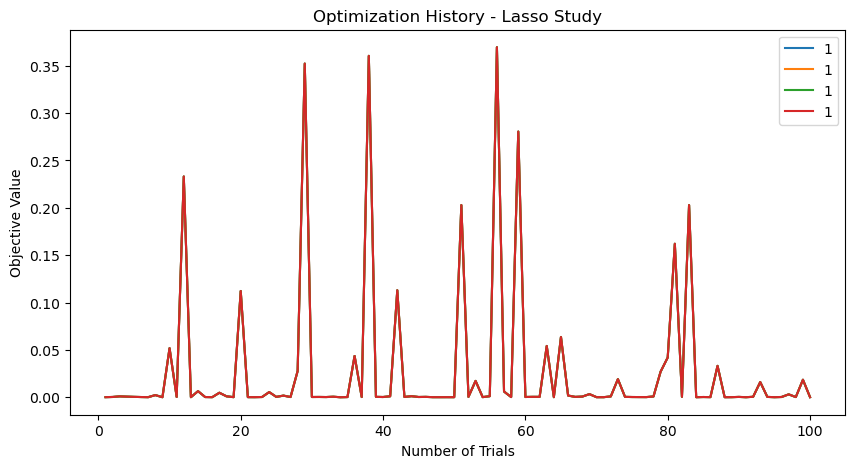

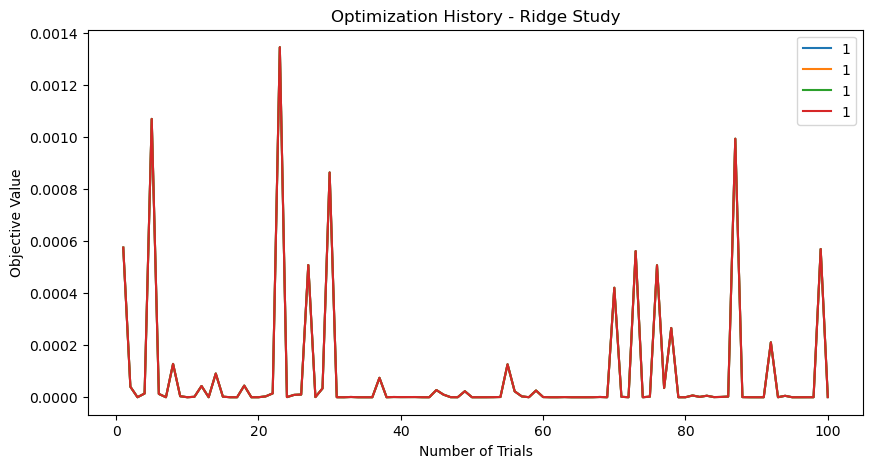

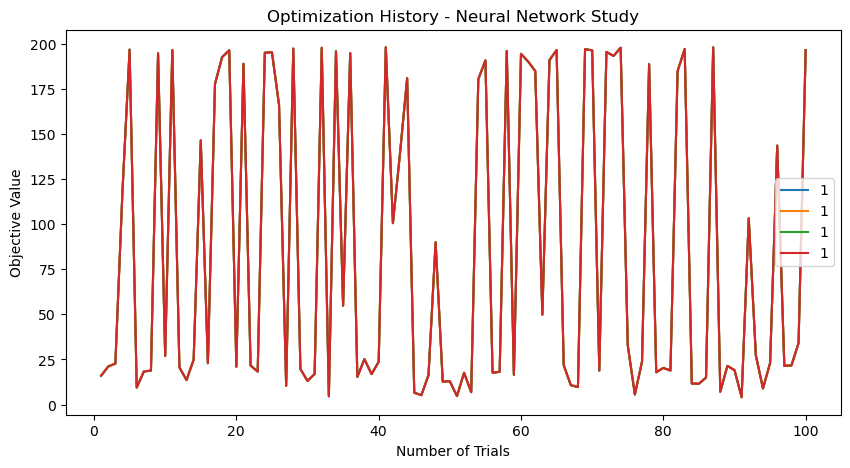

In [40]:
# Visualize optimization history for Lasso
plt.figure(figsize=(10, 5))
for objective in lasso_study.directions:
    trials = lasso_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Lasso Study')
plt.legend()
plt.show()

# Visualize optimization history for Ridge
plt.figure(figsize=(10, 5))
for objective in ridge_study.directions:
    trials = ridge_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Ridge Study')
plt.legend()
plt.show()

# Visualize optimization history for Neural Network
plt.figure(figsize=(10, 5))
for objective in nn_study.directions:
    trials = nn_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Neural Network Study')
plt.legend()
plt.show()

# Particle swarm optimisation

In [41]:
# PSO optimisation
import numpy as np
import pyswarms as ps
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import time

# Assuming X and y are your features and target variable
# Replace these with your actual data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective functions for optimization

# Lasso
def lasso_objective(params):
    alpha = params[0][0]  # Extract alpha from params
    # Clip alpha to ensure it is within the acceptable range
    alpha = np.clip(alpha, 0.0, np.inf)
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae

# Ridge Regression
def ridge_objective(params):
    alpha = params[0][0]   # Extract alpha from params
    # Clip alpha to ensure it is within the acceptable range
    alpha = np.clip(alpha, 0.0, np.inf)
    
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae

def nn_objective(params):
    # Assuming params contains hyperparameters for the neural network
    hidden_layer_sizes = tuple(np.maximum(params[0].astype(int), 1)) 
    hidden_layer_sizes = tuple(int(size) for size in hidden_layer_sizes)
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000)
    nn_model.fit(X_train, y_train)
    y_pred = nn_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae


# Set up PSO options
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Lasso Optimization
start_time = time.time()
dimensions_lasso = (1)  # Only one parameter, alpha
center_lasso = [0.5]  # Set the center as a scalar
optimizer_lasso = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_lasso, options=options, center=center_lasso)
best_params_lasso = optimizer_lasso.optimize(lasso_objective, iters=100)
lasso_training_time = time.time() - start_time

# Ridge Optimization
start_time = time.time()
dimensions_ridge = (1)  # Only one parameter, alpha
center_ridge = [0.5]  # Set the center as a scalar
optimizer_ridge = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_ridge, options=options, center=center_ridge)
best_params_ridge = optimizer_ridge.optimize(ridge_objective, iters=100)
ridge_training_time = time.time() - start_time

# Neural Network Optimization
start_time = time.time()
dimensions_nn = (3)  # Example: Three hidden layers
center_nn = [0.5]  # Set the center as a scalar
optimizer_nn = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_nn, options=options, center=center_nn)
best_params_nn = optimizer_nn.optimize(nn_objective, iters=100)
nn_training_time = time.time() - start_time

# Extract best hyperparameters
best_alpha_lasso = best_params_lasso[0]
best_alpha_ridge = best_params_ridge[0]
if hasattr(best_params_nn[0], '__iter__'):
    best_hidden_layer_sizes_nn = tuple(max(1, int(param)) for param in best_params_nn[0])
else:
    best_hidden_layer_sizes_nn = (max(1, int(best_params_nn[0])),)
    
# Train final models with best hyperparameters
start_time = time.time()
final_lasso_model = Lasso(alpha=best_alpha_lasso)
final_lasso_model.fit(X_train, y_train)
lasso_testing_time = time.time() - start_time

start_time = time.time()
final_ridge_model = Ridge(alpha=np.clip(best_alpha_ridge, 0.0, np.inf))
final_ridge_model.fit(X_train, y_train)
ridge_testing_time = time.time() - start_time

start_time = time.time()
final_nn_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes_nn, max_iter=1000)
final_nn_model.fit(X_train, y_train)
nn_testing_time = time.time() - start_time

# Evaluate final models on test set
y_pred_lasso = final_lasso_model.predict(X_test)
rmse_lasso, mae_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False), mean_absolute_error(y_test, y_pred_lasso)

y_pred_ridge = final_ridge_model.predict(X_test)
rmse_ridge, mae_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False), mean_absolute_error(y_test, y_pred_ridge)

y_pred_nn = final_nn_model.predict(X_test)
rmse_nn, mae_nn = mean_squared_error(y_test, y_pred_nn, squared=False), mean_absolute_error(y_test, y_pred_nn)

# Print results
print(f"Optimal alpha for Lasso: {best_alpha_lasso}")
print(f"RMSE for Lasso on test set: {rmse_lasso}")
print(f"MAE for Lasso on test set: {mae_lasso}")
print(f"Training time for Lasso: {lasso_training_time:.4f} seconds")
print(f"Testing time for Lasso: {lasso_testing_time:.4f} seconds")

print(f"\nOptimal alpha for Ridge: {best_alpha_ridge}")
print(f"RMSE for Ridge on test set: {rmse_ridge}")
print(f"MAE for Ridge on test set: {mae_ridge}")
print(f"Training time for Ridge: {ridge_training_time:.4f} seconds")
print(f"Testing time for Ridge: {ridge_testing_time:.4f} seconds")

print(f"\nOptimal hidden layer sizes for Neural Network: {best_hidden_layer_sizes_nn}")
print(f"RMSE for Neural Network on test set: {rmse_nn}")
print(f"MAE for Neural Network on test set: {mae_nn}")
print(f"Training time for Neural Network: {nn_training_time:.4f} seconds")
print(f"Testing time for Neural Network: {nn_testing_time:.4f} seconds")

2023-12-30 08:39:17,795 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████|100/100, best_cost=0.000291
2023-12-30 08:39:18,165 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0002910831221491977, best pos: [0.02644065]
2023-12-30 08:39:18,169 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████|100/100, best_cost=7.5e-14
2023-12-30 08:39:18,375 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.495241532995202e-14, best pos: [-0.07835082]
2023-12-30 08:39:18,379 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████|100/100, best_cost=1.78
2023-12-30 08:40:04,046 - pyswarms.single.global_best - INFO - Optimization finished | best cost

Optimal alpha for Lasso: 0.0002910831221491977
RMSE for Lasso on test set: 0.00046688392048485454
MAE for Lasso on test set: 0.00034570927003580554
Training time for Lasso: 0.3725 seconds
Testing time for Lasso: 0.0017 seconds

Optimal alpha for Ridge: 7.495241532995202e-14
RMSE for Ridge on test set: 4.4930211430477556e-14
MAE for Ridge on test set: 2.886912930932794e-14
Training time for Ridge: 0.2105 seconds
Testing time for Ridge: 0.0009 seconds

Optimal hidden layer sizes for Neural Network: (1,)
RMSE for Neural Network on test set: 255.47658001067737
MAE for Neural Network on test set: 195.27426016642298
Training time for Neural Network: 45.6722 seconds
Testing time for Neural Network: 0.2709 seconds


# Differential Evolution Optimisation

In [42]:
#DE optimisation
import time
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.optimize import differential_evolution

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso
def lasso_objective(alpha_array):
    alpha = np.clip(alpha_array[0], 0.0, np.inf)
    lasso_model = Lasso(alpha=alpha)
    start_time = time.time()
    lasso_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = lasso_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Training time for Lasso: {training_time} seconds")
    print(f"Testing time for Lasso: {testing_time} seconds")
    print(f"RMSE for Lasso: {rmse}")
    print(f"MAE for Lasso: {mae}")
    
    return rmse

# Ridge
def ridge_objective(alpha):
    alpha = np.clip(alpha, 0.0, np.inf)
    ridge_model = Ridge(alpha=alpha)
    start_time = time.time()
    ridge_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = ridge_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Training time for Ridge: {training_time} seconds")
    print(f"Testing time for Ridge: {testing_time} seconds")
    print(f"RMSE for Ridge: {rmse}")
    print(f"MAE for Ridge: {mae}")
    
    return rmse

# Neural Network
def nn_objective(params):
    hidden_layer_sizes = tuple(np.maximum(params.astype(int), 1))
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=100)
    start_time = time.time()
    nn_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = nn_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Training time for Neural Network: {training_time} seconds")
    print(f"Testing time for Neural Network: {testing_time} seconds")
    print(f"RMSE for Neural Network: {rmse}")
    print(f"MAE for Neural Network: {mae}")
    
    return rmse

# Differential Evolution Optimization
result_lasso = differential_evolution(lasso_objective, bounds=[(1e-5, 1e2)], maxiter=50)
result_ridge = differential_evolution(ridge_objective, bounds=[(1e-5, 1e2)], maxiter=50)
result_nn = differential_evolution(nn_objective, bounds=[(10, 100), (10, 100), (1e-5, 1e-2)], maxiter=50)

# Extract best hyperparameters
best_alpha_lasso = np.clip(result_lasso.x[0], 0.0, np.inf)
best_alpha_ridge = np.clip(result_ridge.x[0], 0.0, np.inf)
best_hidden_layer_sizes_nn = tuple(np.maximum(result_nn.x[:2].astype(int), 1))
best_learning_rate_nn = result_nn.x[2]

# Train final models with best hyperparameters
final_lasso_model = Lasso(alpha=best_alpha_lasso)
start_time = time.time()
final_lasso_model.fit(X_train, y_train)
end_time = time.time()
training_time_lasso = end_time - start_time

final_ridge_model = Ridge(alpha=best_alpha_ridge)
start_time = time.time()
final_ridge_model.fit(X_train, y_train)
end_time = time.time()
training_time_ridge = end_time - start_time

final_nn_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes_nn, learning_rate_init=best_learning_rate_nn, max_iter=1000)
start_time = time.time()
final_nn_model.fit(X_train, y_train)
end_time = time.time()
training_time_nn = end_time - start_time

# Evaluate final models on test set
start_time = time.time()
y_pred_lasso = final_lasso_model.predict(X_test)
end_time = time.time()
testing_time_lasso = end_time - start_time
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

start_time = time.time()
y_pred_ridge = final_ridge_model.predict(X_test)
end_time = time.time()
testing_time_ridge = end_time - start_time
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

start_time = time.time()
y_pred_nn = final_nn_model.predict(X_test)
end_time = time.time()
testing_time_nn = end_time - start_time
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Print results
print(f"\nOptimal alpha for Lasso: {best_alpha_lasso}")
print(f"RMSE for Lasso on test set: {rmse_lasso}")
print(f"MAE for Lasso on test set: {mae_lasso}")
print(f"Training time for Lasso: {training_time_lasso} seconds")
print(f"Testing time for Lasso: {testing_time_lasso} seconds")

print(f"\nOptimal alpha for Ridge: {best_alpha_ridge}")
print(f"RMSE for Ridge on test set: {rmse_ridge}")
print(f"MAE for Ridge on test set: {mae_ridge}")
print(f"Training time for Ridge: {training_time_ridge} seconds")
print(f"Testing time for Ridge: {testing_time_ridge} seconds")

print(f"\nOptimal hidden layer sizes for Neural Network: {best_hidden_layer_sizes_nn}")
print(f"Optimal learning rate for Neural Network: {best_learning_rate_nn}")
print(f"RMSE for Neural Network on test set: {rmse_nn}")
print(f"MAE for Neural Network on test set: {mae_nn}")
print(f"Training time for Neural Network: {training_time_nn} seconds")
print(f"Testing time for Neural Network: {testing_time_nn} seconds")

Training time for Lasso: 0.0014243125915527344 seconds
Testing time for Lasso: 0.0005521774291992188 seconds
RMSE for Lasso: 0.5772088206549966
MAE for Lasso: 0.47707539909619134
Training time for Lasso: 0.0008089542388916016 seconds
Testing time for Lasso: 0.00034618377685546875 seconds
RMSE for Lasso: 0.4302747731129222
MAE for Lasso: 0.35563127547312434
Training time for Lasso: 0.0005948543548583984 seconds
Testing time for Lasso: 0.00028705596923828125 seconds
RMSE for Lasso: 0.2772370198673418
MAE for Lasso: 0.2291423089261935
Training time for Lasso: 0.0006530284881591797 seconds
Testing time for Lasso: 0.0002880096435546875 seconds
RMSE for Lasso: 0.14580083244678008
MAE for Lasso: 0.12050749718130392
Training time for Lasso: 0.0005590915679931641 seconds
Testing time for Lasso: 0.0002918243408203125 seconds
RMSE for Lasso: 0.5242628965919475
MAE for Lasso: 0.4333144638003151
Training time for Lasso: 0.0005619525909423828 seconds
Testing time for Lasso: 0.00026297569274902344 se

Training time for Lasso: 0.0014328956604003906 seconds
Testing time for Lasso: 0.0008950233459472656 seconds
RMSE for Lasso: 0.00041546688612085803
MAE for Lasso: 0.0003068210075314537
Training time for Lasso: 0.0015101432800292969 seconds
Testing time for Lasso: 0.0005288124084472656 seconds
RMSE for Lasso: 0.0008554124809254515
MAE for Lasso: 0.0007070166569291359
Training time for Lasso: 0.001583099365234375 seconds
Testing time for Lasso: 0.0005619525909423828 seconds
RMSE for Lasso: 0.0004681048699029991
MAE for Lasso: 0.00038689865719072404
Training time for Lasso: 0.0008561611175537109 seconds
Testing time for Lasso: 0.0004439353942871094 seconds
RMSE for Lasso: 0.06393301690372777
MAE for Lasso: 0.052842001825540726
Training time for Lasso: 0.0013010501861572266 seconds
Testing time for Lasso: 0.0003230571746826172 seconds
RMSE for Lasso: 0.0010589344057549785
MAE for Lasso: 0.0008483099380090153
Training time for Lasso: 0.0010371208190917969 seconds
Testing time for Lasso: 0.0

Training time for Lasso: 0.0008449554443359375 seconds
Testing time for Lasso: 0.0002682209014892578 seconds
RMSE for Lasso: 0.00015913380479231433
MAE for Lasso: 0.00013214890230967891
Training time for Ridge: 0.0007300376892089844 seconds
Testing time for Ridge: 0.0002758502960205078 seconds
RMSE for Ridge: 0.0011839576532684738
MAE for Ridge: 0.0009048397569682465
Training time for Ridge: 0.0004658699035644531 seconds
Testing time for Ridge: 0.0002791881561279297 seconds
RMSE for Ridge: 0.0013812338990148608
MAE for Ridge: 0.0010554934816206984
Training time for Ridge: 0.00044798851013183594 seconds
Testing time for Ridge: 0.0002548694610595703 seconds
RMSE for Ridge: 0.002185818326487373
MAE for Ridge: 0.0016694580383963286
Training time for Ridge: 0.0004298686981201172 seconds
Testing time for Ridge: 0.00025200843811035156 seconds
RMSE for Ridge: 0.0008403506382793158
MAE for Ridge: 0.0006423405568076091
Training time for Ridge: 0.0004360675811767578 seconds
Testing time for Ridge

Training time for Ridge: 0.0007271766662597656 seconds
Testing time for Ridge: 0.0002810955047607422 seconds
RMSE for Ridge: 2.5031314765285098e-08
MAE for Ridge: 1.9138158627862722e-08
Training time for Ridge: 0.0005450248718261719 seconds
Testing time for Ridge: 0.000270843505859375 seconds
RMSE for Ridge: 0.00197636286597524
MAE for Ridge: 0.0015096959748990791
Training time for Ridge: 0.0006730556488037109 seconds
Testing time for Ridge: 0.0002789497375488281 seconds
RMSE for Ridge: 0.0004279554291042191
MAE for Ridge: 0.00032718454091263836
Training time for Ridge: 0.00045180320739746094 seconds
Testing time for Ridge: 0.00026106834411621094 seconds
RMSE for Ridge: 6.7906004693711e-08
MAE for Ridge: 5.1918807545403566e-08
Training time for Ridge: 0.00043892860412597656 seconds
Testing time for Ridge: 0.0002830028533935547 seconds
RMSE for Ridge: 1.0450339435910085e-06
MAE for Ridge: 7.990006941616112e-07
Training time for Ridge: 0.00043010711669921875 seconds
Testing time for Ridg

Training time for Ridge: 0.0007100105285644531 seconds
Testing time for Ridge: 0.0002951622009277344 seconds
RMSE for Ridge: 0.0007125362101765348
MAE for Ridge: 0.0005446686584151484
Training time for Ridge: 0.0004611015319824219 seconds
Testing time for Ridge: 0.0002529621124267578 seconds
RMSE for Ridge: 3.008186021729531e-05
MAE for Ridge: 2.300015991903881e-05
Training time for Ridge: 0.00045490264892578125 seconds
Testing time for Ridge: 0.0002608299255371094 seconds
RMSE for Ridge: 0.0017709489416111014
MAE for Ridge: 0.0013529842543088322
Training time for Ridge: 0.0004811286926269531 seconds
Testing time for Ridge: 0.0002627372741699219 seconds
RMSE for Ridge: 4.81093067203385e-10
MAE for Ridge: 3.6782481616093323e-10
Training time for Ridge: 0.0006160736083984375 seconds
Testing time for Ridge: 0.0003349781036376953 seconds
RMSE for Ridge: 6.387674293863614e-10
MAE for Ridge: 4.883797544152912e-10
Training time for Ridge: 0.0005612373352050781 seconds
Testing time for Ridge: 

Training time for Neural Network: 0.4247121810913086 seconds
Testing time for Neural Network: 0.0005469322204589844 seconds
RMSE for Neural Network: 0.2648575917353925
MAE for Neural Network: 0.19226251400309582
Training time for Neural Network: 0.8820748329162598 seconds
Testing time for Neural Network: 0.0014710426330566406 seconds
RMSE for Neural Network: 256.77791811843184
MAE for Neural Network: 196.93508691504437
Training time for Neural Network: 0.6600620746612549 seconds
Testing time for Neural Network: 0.0064198970794677734 seconds
RMSE for Neural Network: 16.63813295239224
MAE for Neural Network: 13.444686795376464
Training time for Neural Network: 1.2647111415863037 seconds
Testing time for Neural Network: 0.000598907470703125 seconds
RMSE for Neural Network: 0.29135447368732037
MAE for Neural Network: 0.22631986167740997
Training time for Neural Network: 0.6274971961975098 seconds
Testing time for Neural Network: 0.000598907470703125 seconds
RMSE for Neural Network: 255.848

Training time for Neural Network: 0.38828492164611816 seconds
Testing time for Neural Network: 0.0006489753723144531 seconds
RMSE for Neural Network: 256.7517199099259
MAE for Neural Network: 196.90114238035528
Training time for Neural Network: 0.12122011184692383 seconds
Testing time for Neural Network: 0.0004398822784423828 seconds
RMSE for Neural Network: 257.3320552584971
MAE for Neural Network: 197.65717446492778
Training time for Neural Network: 0.6178102493286133 seconds
Testing time for Neural Network: 0.0022516250610351562 seconds
RMSE for Neural Network: 0.5122367974723775
MAE for Neural Network: 0.4175306922149805
Training time for Neural Network: 0.4055047035217285 seconds
Testing time for Neural Network: 0.0005640983581542969 seconds
RMSE for Neural Network: 0.4762953875007699
MAE for Neural Network: 0.369720192074969
Training time for Neural Network: 0.13686108589172363 seconds
Testing time for Neural Network: 0.0004527568817138672 seconds
RMSE for Neural Network: 256.945

Training time for Neural Network: 0.14736700057983398 seconds
Testing time for Neural Network: 0.0004978179931640625 seconds
RMSE for Neural Network: 256.60554879099107
MAE for Neural Network: 196.7113338373521
Training time for Neural Network: 0.48780012130737305 seconds
Testing time for Neural Network: 0.002065896987915039 seconds
RMSE for Neural Network: 257.6210160460301
MAE for Neural Network: 198.03312130446483
Training time for Neural Network: 0.2678699493408203 seconds
Testing time for Neural Network: 0.0011970996856689453 seconds
RMSE for Neural Network: 0.618624248872995
MAE for Neural Network: 0.46992722974550455
Training time for Neural Network: 0.6095149517059326 seconds
Testing time for Neural Network: 0.0007288455963134766 seconds
RMSE for Neural Network: 256.2549199724426
MAE for Neural Network: 196.25830024366212
Training time for Neural Network: 0.747150182723999 seconds
Testing time for Neural Network: 0.0015048980712890625 seconds
RMSE for Neural Network: 0.20733897

Training time for Neural Network: 0.4164431095123291 seconds
Testing time for Neural Network: 0.0008342266082763672 seconds
RMSE for Neural Network: 0.31451427137117993
MAE for Neural Network: 0.2638722014003607
Training time for Neural Network: 0.4610888957977295 seconds
Testing time for Neural Network: 0.0005981922149658203 seconds
RMSE for Neural Network: 256.3051881324978
MAE for Neural Network: 196.3232765151791
Training time for Neural Network: 0.3658430576324463 seconds
Testing time for Neural Network: 0.0027298927307128906 seconds
RMSE for Neural Network: 0.26747468594846374
MAE for Neural Network: 0.20474413377853132
Training time for Neural Network: 0.5276138782501221 seconds
Testing time for Neural Network: 0.0022869110107421875 seconds
RMSE for Neural Network: 0.2489402298115432
MAE for Neural Network: 0.19619815900341991
Training time for Neural Network: 0.4687957763671875 seconds
Testing time for Neural Network: 0.0023500919342041016 seconds
RMSE for Neural Network: 256.7

Training time for Neural Network: 0.26584410667419434 seconds
Testing time for Neural Network: 0.0005440711975097656 seconds
RMSE for Neural Network: 0.7158311031676956
MAE for Neural Network: 0.5658477231647491
Training time for Neural Network: 0.4254891872406006 seconds
Testing time for Neural Network: 0.0010759830474853516 seconds
RMSE for Neural Network: 257.04034000768405
MAE for Neural Network: 197.27712897410547
Training time for Neural Network: 0.41565799713134766 seconds
Testing time for Neural Network: 0.0005688667297363281 seconds
RMSE for Neural Network: 0.36401663856168415
MAE for Neural Network: 0.29224876850192166
Training time for Neural Network: 0.11730527877807617 seconds
Testing time for Neural Network: 0.00043272972106933594 seconds
RMSE for Neural Network: 255.90681171684693
MAE for Neural Network: 195.8072622909927
Training time for Neural Network: 0.15405488014221191 seconds
Testing time for Neural Network: 0.0004088878631591797 seconds
RMSE for Neural Network: 0

Training time for Neural Network: 0.2587289810180664 seconds
Testing time for Neural Network: 0.0005381107330322266 seconds
RMSE for Neural Network: 258.1068913423147
MAE for Neural Network: 198.6647844571188
Training time for Neural Network: 0.414351224899292 seconds
Testing time for Neural Network: 0.001813650131225586 seconds
RMSE for Neural Network: 0.20448043174551458
MAE for Neural Network: 0.15168231377019098
Training time for Neural Network: 0.3757140636444092 seconds
Testing time for Neural Network: 0.0005881786346435547 seconds
RMSE for Neural Network: 7.027133012085217
MAE for Neural Network: 5.445080869686365
Training time for Neural Network: 0.43181300163269043 seconds
Testing time for Neural Network: 0.0006301403045654297 seconds
RMSE for Neural Network: 257.8942040688637
MAE for Neural Network: 198.3883810038096
Training time for Neural Network: 0.4925708770751953 seconds
Testing time for Neural Network: 0.001493215560913086 seconds
RMSE for Neural Network: 0.29036754925

Training time for Neural Network: 0.789038896560669 seconds
Testing time for Neural Network: 0.0011830329895019531 seconds
RMSE for Neural Network: 0.21275951368375334
MAE for Neural Network: 0.16605150583745057
Training time for Neural Network: 0.8185288906097412 seconds
Testing time for Neural Network: 0.000926971435546875 seconds
RMSE for Neural Network: 257.4045774900045
MAE for Neural Network: 197.7514746792239
Training time for Neural Network: 0.7164061069488525 seconds
Testing time for Neural Network: 0.0008177757263183594 seconds
RMSE for Neural Network: 258.0651879732456
MAE for Neural Network: 198.61060009140144
Training time for Neural Network: 0.1420583724975586 seconds
Testing time for Neural Network: 0.00046896934509277344 seconds
RMSE for Neural Network: 257.93606951973123
MAE for Neural Network: 198.44280078724856
Training time for Neural Network: 0.7748029232025146 seconds
Testing time for Neural Network: 0.0010628700256347656 seconds
RMSE for Neural Network: 256.24056

Training time for Neural Network: 0.5569469928741455 seconds
Testing time for Neural Network: 0.0010790824890136719 seconds
RMSE for Neural Network: 257.82874133844865
MAE for Neural Network: 198.30327552808774
Training time for Neural Network: 0.5838310718536377 seconds
Testing time for Neural Network: 0.0009059906005859375 seconds
RMSE for Neural Network: 256.9487356009167
MAE for Neural Network: 197.15775904566829
Training time for Neural Network: 0.5478661060333252 seconds
Testing time for Neural Network: 0.0008800029754638672 seconds
RMSE for Neural Network: 257.4758701543741
MAE for Neural Network: 197.8442643514138
Training time for Neural Network: 0.5072147846221924 seconds
Testing time for Neural Network: 0.0017561912536621094 seconds
RMSE for Neural Network: 256.265733795452
MAE for Neural Network: 196.27227887383867
Training time for Neural Network: 0.5205309391021729 seconds
Testing time for Neural Network: 0.0008151531219482422 seconds
RMSE for Neural Network: 257.74574236

Training time for Neural Network: 0.6246950626373291 seconds
Testing time for Neural Network: 0.001371145248413086 seconds
RMSE for Neural Network: 257.3386432819616
MAE for Neural Network: 197.66564332528978
Training time for Neural Network: 0.5564539432525635 seconds
Testing time for Neural Network: 0.0008370876312255859 seconds
RMSE for Neural Network: 0.31835069717925324
MAE for Neural Network: 0.2509105126099767
Training time for Neural Network: 0.9038112163543701 seconds
Testing time for Neural Network: 0.005137920379638672 seconds
RMSE for Neural Network: 256.05870309200867
MAE for Neural Network: 196.00458559894523
Training time for Neural Network: 1.0164999961853027 seconds
Testing time for Neural Network: 0.001280069351196289 seconds
RMSE for Neural Network: 257.0127484412269
MAE for Neural Network: 197.24117746128312
Training time for Neural Network: 0.5482511520385742 seconds
Testing time for Neural Network: 0.001336812973022461 seconds
RMSE for Neural Network: 0.4186889081

Training time for Neural Network: 0.6574611663818359 seconds
Testing time for Neural Network: 0.0009219646453857422 seconds
RMSE for Neural Network: 257.33426945835345
MAE for Neural Network: 197.65994906066447
Training time for Neural Network: 0.48699021339416504 seconds
Testing time for Neural Network: 0.0006079673767089844 seconds
RMSE for Neural Network: 0.1718664321765796
MAE for Neural Network: 0.13023179585408579
Training time for Neural Network: 0.623291015625 seconds
Testing time for Neural Network: 0.0013790130615234375 seconds
RMSE for Neural Network: 258.00438054885853
MAE for Neural Network: 198.53158340022435
Training time for Neural Network: 0.5637218952178955 seconds
Testing time for Neural Network: 0.0008189678192138672 seconds
RMSE for Neural Network: 257.63609419667534
MAE for Neural Network: 198.05273605259333
Training time for Neural Network: 0.3997960090637207 seconds
Testing time for Neural Network: 0.0007910728454589844 seconds
RMSE for Neural Network: 0.4440196

Training time for Neural Network: 0.6757440567016602 seconds
Testing time for Neural Network: 0.001416921615600586 seconds
RMSE for Neural Network: 256.00884237307827
MAE for Neural Network: 195.94009222850735
Training time for Neural Network: 0.5158040523529053 seconds
Testing time for Neural Network: 0.0013539791107177734 seconds
RMSE for Neural Network: 257.1419818957711
MAE for Neural Network: 197.40954404051766
Training time for Neural Network: 0.5943000316619873 seconds
Testing time for Neural Network: 0.0008170604705810547 seconds
RMSE for Neural Network: 257.39540847546886
MAE for Neural Network: 197.7395396203133
Training time for Neural Network: 0.5023078918457031 seconds
Testing time for Neural Network: 0.000820159912109375 seconds
RMSE for Neural Network: 258.436264135923
MAE for Neural Network: 199.09252081766542
Training time for Neural Network: 0.543377161026001 seconds
Testing time for Neural Network: 0.0008389949798583984 seconds
RMSE for Neural Network: 257.5143821629

Training time for Neural Network: 0.8132309913635254 seconds
Testing time for Neural Network: 0.0014150142669677734 seconds
RMSE for Neural Network: 256.78246657911393
MAE for Neural Network: 196.94101748354444
Training time for Neural Network: 0.6555271148681641 seconds
Testing time for Neural Network: 0.0015339851379394531 seconds
RMSE for Neural Network: 0.3967343746593853
MAE for Neural Network: 0.3226820109639678
Training time for Neural Network: 0.2470850944519043 seconds
Testing time for Neural Network: 0.0013189315795898438 seconds
RMSE for Neural Network: 257.6584263430889
MAE for Neural Network: 198.08178586280206
Training time for Neural Network: 0.6314949989318848 seconds
Testing time for Neural Network: 0.0008549690246582031 seconds
RMSE for Neural Network: 258.37315992444604
MAE for Neural Network: 199.0106002059774
Training time for Neural Network: 0.606738805770874 seconds
Testing time for Neural Network: 0.0033159255981445312 seconds
RMSE for Neural Network: 257.180779

Training time for Neural Network: 1.1353950500488281 seconds
Testing time for Neural Network: 0.0007879734039306641 seconds
RMSE for Neural Network: 256.2335336985684
MAE for Neural Network: 196.23065377163354
Training time for Neural Network: 0.4978208541870117 seconds
Testing time for Neural Network: 0.0016632080078125 seconds
RMSE for Neural Network: 0.3348310398251214
MAE for Neural Network: 0.26513192905967636
Training time for Neural Network: 0.5518152713775635 seconds
Testing time for Neural Network: 0.0008661746978759766 seconds
RMSE for Neural Network: 257.1584534968463
MAE for Neural Network: 197.43099916145297
Training time for Neural Network: 0.6291978359222412 seconds
Testing time for Neural Network: 0.001806020736694336 seconds
RMSE for Neural Network: 0.1517437580763268
MAE for Neural Network: 0.1148163498878298
Training time for Neural Network: 0.5869569778442383 seconds
Testing time for Neural Network: 0.003656148910522461 seconds
RMSE for Neural Network: 0.47332906829

Training time for Neural Network: 0.6291377544403076 seconds
Testing time for Neural Network: 0.0006191730499267578 seconds
RMSE for Neural Network: 0.8915663769673114
MAE for Neural Network: 0.7134368396534257
Training time for Neural Network: 0.5704267024993896 seconds
Testing time for Neural Network: 0.0007910728454589844 seconds
RMSE for Neural Network: 0.6469823332606057
MAE for Neural Network: 0.5423068856697687
Training time for Neural Network: 0.7389621734619141 seconds
Testing time for Neural Network: 0.0008649826049804688 seconds
RMSE for Neural Network: 257.21230799837474
MAE for Neural Network: 197.50114078366937
Training time for Neural Network: 0.6337547302246094 seconds
Testing time for Neural Network: 0.001463174819946289 seconds
RMSE for Neural Network: 0.27369096905124285
MAE for Neural Network: 0.21176955043006182
Training time for Neural Network: 0.7122619152069092 seconds
Testing time for Neural Network: 0.0008881092071533203 seconds
RMSE for Neural Network: 256.22

Training time for Neural Network: 0.5369811058044434 seconds
Testing time for Neural Network: 0.0013339519500732422 seconds
RMSE for Neural Network: 256.4663892057711
MAE for Neural Network: 196.53158338536895
Training time for Neural Network: 0.6224851608276367 seconds
Testing time for Neural Network: 0.0009021759033203125 seconds
RMSE for Neural Network: 258.3040028620328
MAE for Neural Network: 198.92080615046044
Training time for Neural Network: 0.6861989498138428 seconds
Testing time for Neural Network: 0.0009088516235351562 seconds
RMSE for Neural Network: 256.36552049208234
MAE for Neural Network: 196.4012498484182
Training time for Neural Network: 0.175400972366333 seconds
Testing time for Neural Network: 0.001194000244140625 seconds
RMSE for Neural Network: 258.2694174033863
MAE for Neural Network: 198.8758939411325
Training time for Neural Network: 1.2883150577545166 seconds
Testing time for Neural Network: 0.0009789466857910156 seconds
RMSE for Neural Network: 0.186693968182

Training time for Neural Network: 0.6260659694671631 seconds
Testing time for Neural Network: 0.0008180141448974609 seconds
RMSE for Neural Network: 0.19983699056576215
MAE for Neural Network: 0.15486224910033505
Training time for Neural Network: 0.5240042209625244 seconds
Testing time for Neural Network: 0.0008947849273681641 seconds
RMSE for Neural Network: 0.20332204014249577
MAE for Neural Network: 0.1491903060975843
Training time for Neural Network: 0.37178802490234375 seconds
Testing time for Neural Network: 0.000560760498046875 seconds
RMSE for Neural Network: 257.56100853033905
MAE for Neural Network: 197.955051312578
Training time for Neural Network: 0.5326781272888184 seconds
Testing time for Neural Network: 0.0016019344329833984 seconds
RMSE for Neural Network: 258.3235873920104
MAE for Neural Network: 198.94623652654911
Training time for Neural Network: 0.5647628307342529 seconds
Testing time for Neural Network: 0.001682281494140625 seconds
RMSE for Neural Network: 257.8353

Training time for Neural Network: 0.891840934753418 seconds
Testing time for Neural Network: 0.0006852149963378906 seconds
RMSE for Neural Network: 0.3898234990126401
MAE for Neural Network: 0.31994837912062496
Training time for Neural Network: 1.0386040210723877 seconds
Testing time for Neural Network: 0.0006659030914306641 seconds
RMSE for Neural Network: 0.22915669887772822
MAE for Neural Network: 0.18597952814666116
Training time for Neural Network: 1.0650413036346436 seconds
Testing time for Neural Network: 0.0009357929229736328 seconds
RMSE for Neural Network: 257.6204382133482
MAE for Neural Network: 198.03236960213738
Training time for Neural Network: 0.1842963695526123 seconds
Testing time for Neural Network: 0.0012898445129394531 seconds
RMSE for Neural Network: 257.61356281542754
MAE for Neural Network: 198.0234253098815
Training time for Neural Network: 0.9249532222747803 seconds
Testing time for Neural Network: 0.002138853073120117 seconds
RMSE for Neural Network: 0.280888

Training time for Neural Network: 0.521946907043457 seconds
Testing time for Neural Network: 0.0011031627655029297 seconds
RMSE for Neural Network: 256.0983565993305
MAE for Neural Network: 196.055869905377
Training time for Neural Network: 0.5195298194885254 seconds
Testing time for Neural Network: 0.0019237995147705078 seconds
RMSE for Neural Network: 256.89518149443705
MAE for Neural Network: 197.08795879012945
Training time for Neural Network: 0.5203711986541748 seconds
Testing time for Neural Network: 0.000743865966796875 seconds
RMSE for Neural Network: 0.4091831075092512
MAE for Neural Network: 0.3240760756154226
Training time for Neural Network: 0.5425159931182861 seconds
Testing time for Neural Network: 0.0013549327850341797 seconds
RMSE for Neural Network: 0.17063819624068552
MAE for Neural Network: 0.14082103875216334
Training time for Neural Network: 0.5589230060577393 seconds
Testing time for Neural Network: 0.002688884735107422 seconds
RMSE for Neural Network: 255.9320009

Training time for Neural Network: 0.72418212890625 seconds
Testing time for Neural Network: 0.0007758140563964844 seconds
RMSE for Neural Network: 256.66903305796654
MAE for Neural Network: 196.7933128331641
Training time for Neural Network: 1.036039113998413 seconds
Testing time for Neural Network: 0.0021331310272216797 seconds
RMSE for Neural Network: 0.16166340626514056
MAE for Neural Network: 0.13022362620792594
Training time for Neural Network: 1.1969821453094482 seconds
Testing time for Neural Network: 0.0006508827209472656 seconds
RMSE for Neural Network: 0.0901672934091394
MAE for Neural Network: 0.06753650156086471
Training time for Neural Network: 0.8655719757080078 seconds
Testing time for Neural Network: 0.0006849765777587891 seconds
RMSE for Neural Network: 0.17992391514964723
MAE for Neural Network: 0.14006769782776293
Training time for Neural Network: 0.9767601490020752 seconds
Testing time for Neural Network: 0.0006380081176757812 seconds
RMSE for Neural Network: 257.58

Training time for Neural Network: 0.540992021560669 seconds
Testing time for Neural Network: 0.0008623600006103516 seconds
RMSE for Neural Network: 0.24030480511392574
MAE for Neural Network: 0.18204121825549507
Training time for Neural Network: 0.582423210144043 seconds
Testing time for Neural Network: 0.0013942718505859375 seconds
RMSE for Neural Network: 258.29858626937937
MAE for Neural Network: 198.91377250899453
Training time for Neural Network: 0.5870177745819092 seconds
Testing time for Neural Network: 0.0008661746978759766 seconds
RMSE for Neural Network: 0.2394656100733611
MAE for Neural Network: 0.1994429077812272
Training time for Neural Network: 0.56227707862854 seconds
Testing time for Neural Network: 0.0013718605041503906 seconds
RMSE for Neural Network: 0.49021384072376795
MAE for Neural Network: 0.39624915728148496
Training time for Neural Network: 0.17306804656982422 seconds
Testing time for Neural Network: 0.0004987716674804688 seconds
RMSE for Neural Network: 257.01

Training time for Neural Network: 0.8571288585662842 seconds
Testing time for Neural Network: 0.004366159439086914 seconds
RMSE for Neural Network: 257.6252407504567
MAE for Neural Network: 198.0386171854641
Training time for Neural Network: 0.8101911544799805 seconds
Testing time for Neural Network: 0.0008749961853027344 seconds
RMSE for Neural Network: 0.2154128198466018
MAE for Neural Network: 0.16149556869787043
Training time for Neural Network: 0.5324254035949707 seconds
Testing time for Neural Network: 0.0012066364288330078 seconds
RMSE for Neural Network: 0.28911454972879164
MAE for Neural Network: 0.22273445517406132
Training time for Neural Network: 0.7516019344329834 seconds
Testing time for Neural Network: 0.0008351802825927734 seconds
RMSE for Neural Network: 257.14371805137597
MAE for Neural Network: 197.4118055190356
Training time for Neural Network: 0.5749640464782715 seconds
Testing time for Neural Network: 0.002240896224975586 seconds
RMSE for Neural Network: 257.17418

Training time for Neural Network: 0.5876932144165039 seconds
Testing time for Neural Network: 0.0014379024505615234 seconds
RMSE for Neural Network: 0.598062649222229
MAE for Neural Network: 0.4797991395992127
Training time for Neural Network: 0.575427770614624 seconds
Testing time for Neural Network: 0.0008130073547363281 seconds
RMSE for Neural Network: 0.7678248115033369
MAE for Neural Network: 0.6182378128009265
Training time for Neural Network: 0.5519199371337891 seconds
Testing time for Neural Network: 0.0017361640930175781 seconds
RMSE for Neural Network: 0.26397987640275605
MAE for Neural Network: 0.2145430709744065
Training time for Neural Network: 0.5241231918334961 seconds
Testing time for Neural Network: 0.0007827281951904297 seconds
RMSE for Neural Network: 0.3620439674107199
MAE for Neural Network: 0.2951073824934029
Training time for Neural Network: 0.6040189266204834 seconds
Testing time for Neural Network: 0.0006868839263916016 seconds
RMSE for Neural Network: 257.9008

Training time for Neural Network: 0.46860814094543457 seconds
Testing time for Neural Network: 0.0008497238159179688 seconds
RMSE for Neural Network: 0.49653733573547054
MAE for Neural Network: 0.3569742631054678
Training time for Neural Network: 0.5547440052032471 seconds
Testing time for Neural Network: 0.0008289813995361328 seconds
RMSE for Neural Network: 257.4944468066278
MAE for Neural Network: 197.86843952801385
Training time for Neural Network: 0.6502699851989746 seconds
Testing time for Neural Network: 0.0014138221740722656 seconds
RMSE for Neural Network: 0.1503017486004367
MAE for Neural Network: 0.1207927911769842
Training time for Neural Network: 0.6352818012237549 seconds
Testing time for Neural Network: 0.001024007797241211 seconds
RMSE for Neural Network: 257.7403817876003
MAE for Neural Network: 198.18837914725972
Training time for Neural Network: 0.5765461921691895 seconds
Testing time for Neural Network: 0.0015270709991455078 seconds
RMSE for Neural Network: 257.1099

Training time for Neural Network: 0.7432188987731934 seconds
Testing time for Neural Network: 0.001809835433959961 seconds
RMSE for Neural Network: 0.4563413885002732
MAE for Neural Network: 0.35309845966224884
Training time for Neural Network: 0.8235640525817871 seconds
Testing time for Neural Network: 0.0008807182312011719 seconds
RMSE for Neural Network: 0.22202830578658952
MAE for Neural Network: 0.16048555032711867
Training time for Neural Network: 0.8400530815124512 seconds
Testing time for Neural Network: 0.0008158683776855469 seconds
RMSE for Neural Network: 257.67262738219273
MAE for Neural Network: 198.10025776621885
Training time for Neural Network: 0.7212991714477539 seconds
Testing time for Neural Network: 0.0006940364837646484 seconds
RMSE for Neural Network: 0.16447853099613602
MAE for Neural Network: 0.12909402186173957
Training time for Neural Network: 0.8326611518859863 seconds
Testing time for Neural Network: 0.0013668537139892578 seconds
RMSE for Neural Network: 256

Training time for Neural Network: 0.704416036605835 seconds
Testing time for Neural Network: 0.002260923385620117 seconds
RMSE for Neural Network: 256.6902566134222
MAE for Neural Network: 196.82077396775102
Training time for Neural Network: 0.633220911026001 seconds
Testing time for Neural Network: 0.0009479522705078125 seconds
RMSE for Neural Network: 0.41565846505329856
MAE for Neural Network: 0.33115903593503826
Training time for Neural Network: 0.6621267795562744 seconds
Testing time for Neural Network: 0.0013611316680908203 seconds
RMSE for Neural Network: 0.21113166505875014
MAE for Neural Network: 0.15995782715796833
Training time for Neural Network: 0.7231979370117188 seconds
Testing time for Neural Network: 0.0006840229034423828 seconds
RMSE for Neural Network: 0.4314967437835165
MAE for Neural Network: 0.33410012000516737
Training time for Neural Network: 1.260401964187622 seconds
Testing time for Neural Network: 0.0033767223358154297 seconds
RMSE for Neural Network: 0.54099

Training time for Neural Network: 0.9546701908111572 seconds
Testing time for Neural Network: 0.0008189678192138672 seconds
RMSE for Neural Network: 258.42889661855565
MAE for Neural Network: 199.0829571622948
Training time for Neural Network: 0.7999460697174072 seconds
Testing time for Neural Network: 0.0012598037719726562 seconds
RMSE for Neural Network: 0.2340739829650746
MAE for Neural Network: 0.1798334169252255
Training time for Neural Network: 1.7232351303100586 seconds
Testing time for Neural Network: 0.0009169578552246094 seconds
RMSE for Neural Network: 258.14555219021565
MAE for Neural Network: 198.71501035551225
Training time for Neural Network: 0.8968150615692139 seconds
Testing time for Neural Network: 0.0014798641204833984 seconds
RMSE for Neural Network: 0.20333054999543054
MAE for Neural Network: 0.1532682276908683
Training time for Neural Network: 0.8898830413818359 seconds
Testing time for Neural Network: 0.0006289482116699219 seconds
RMSE for Neural Network: 256.210

Training time for Neural Network: 1.0139119625091553 seconds
Testing time for Neural Network: 0.0008802413940429688 seconds
RMSE for Neural Network: 257.0973234496549
MAE for Neural Network: 197.35136926298853
Training time for Neural Network: 0.8705670833587646 seconds
Testing time for Neural Network: 0.0008769035339355469 seconds
RMSE for Neural Network: 256.9439422216493
MAE for Neural Network: 197.15151196326707
Training time for Neural Network: 0.7588317394256592 seconds
Testing time for Neural Network: 0.0014519691467285156 seconds
RMSE for Neural Network: 257.4892744493483
MAE for Neural Network: 197.8617084770366
Training time for Neural Network: 0.812180757522583 seconds
Testing time for Neural Network: 0.0009090900421142578 seconds
RMSE for Neural Network: 0.18954419036267073
MAE for Neural Network: 0.15067284282535462
Training time for Neural Network: 0.8177342414855957 seconds
Testing time for Neural Network: 0.0030851364135742188 seconds
RMSE for Neural Network: 257.240171

Training time for Neural Network: 0.7381038665771484 seconds
Testing time for Neural Network: 0.0008749961853027344 seconds
RMSE for Neural Network: 257.9550812495265
MAE for Neural Network: 198.46751161701457
Training time for Neural Network: 0.780487060546875 seconds
Testing time for Neural Network: 0.0009388923645019531 seconds
RMSE for Neural Network: 257.4114533327359
MAE for Neural Network: 197.7604245845747
Training time for Neural Network: 0.78977370262146 seconds
Testing time for Neural Network: 0.002103090286254883 seconds
RMSE for Neural Network: 257.1496325097594
MAE for Neural Network: 197.41950948400284
Training time for Neural Network: 0.9807040691375732 seconds
Testing time for Neural Network: 0.0008790493011474609 seconds
RMSE for Neural Network: 0.29601428884454745
MAE for Neural Network: 0.2336758282487154
Training time for Neural Network: 0.7977817058563232 seconds
Testing time for Neural Network: 0.000904083251953125 seconds
RMSE for Neural Network: 0.3532101660396

Training time for Neural Network: 0.6800398826599121 seconds
Testing time for Neural Network: 0.0031480789184570312 seconds
RMSE for Neural Network: 0.19484559052590741
MAE for Neural Network: 0.14466178952145184
Training time for Neural Network: 0.6847128868103027 seconds
Testing time for Neural Network: 0.0013320446014404297 seconds
RMSE for Neural Network: 257.26497153460235
MAE for Neural Network: 197.56972137374632
Training time for Neural Network: 0.7435629367828369 seconds
Testing time for Neural Network: 0.0006999969482421875 seconds
RMSE for Neural Network: 0.24298777960465923
MAE for Neural Network: 0.1887314394188986
Training time for Neural Network: 0.7721128463745117 seconds
Testing time for Neural Network: 0.0008611679077148438 seconds
RMSE for Neural Network: 255.90411801768866
MAE for Neural Network: 195.80542944699283
Training time for Neural Network: 0.7283592224121094 seconds
Testing time for Neural Network: 0.001544952392578125 seconds
RMSE for Neural Network: 256.8

Training time for Neural Network: 0.684067964553833 seconds
Testing time for Neural Network: 0.0019829273223876953 seconds
RMSE for Neural Network: 5.154711416543802
MAE for Neural Network: 4.048941110979074
Training time for Neural Network: 0.7332499027252197 seconds
Testing time for Neural Network: 0.0008001327514648438 seconds
RMSE for Neural Network: 257.1160688464951
MAE for Neural Network: 197.37578900178116
Training time for Neural Network: 0.6093859672546387 seconds
Testing time for Neural Network: 0.0008912086486816406 seconds
RMSE for Neural Network: 256.3880399591613
MAE for Neural Network: 196.43035061889765
Training time for Neural Network: 0.643740177154541 seconds
Testing time for Neural Network: 0.003242015838623047 seconds
RMSE for Neural Network: 258.3252727953413
MAE for Neural Network: 198.94842494925027
Training time for Neural Network: 0.6350619792938232 seconds
Testing time for Neural Network: 0.0006449222564697266 seconds
RMSE for Neural Network: 0.3836336525276

Training time for Neural Network: 0.5703897476196289 seconds
Testing time for Neural Network: 0.0008280277252197266 seconds
RMSE for Neural Network: 256.96106538879553
MAE for Neural Network: 197.173827752937
Training time for Neural Network: 0.574444055557251 seconds
Testing time for Neural Network: 0.0008509159088134766 seconds
RMSE for Neural Network: 0.2255934704617822
MAE for Neural Network: 0.15991024673705576
Training time for Neural Network: 0.5923850536346436 seconds
Testing time for Neural Network: 0.0009109973907470703 seconds
RMSE for Neural Network: 0.15362764405489587
MAE for Neural Network: 0.12560702602263712
Training time for Neural Network: 0.6467368602752686 seconds
Testing time for Neural Network: 0.0023670196533203125 seconds
RMSE for Neural Network: 0.19403979492221568
MAE for Neural Network: 0.16023264186277497
Training time for Neural Network: 0.5605382919311523 seconds
Testing time for Neural Network: 0.0008330345153808594 seconds
RMSE for Neural Network: 0.303

Training time for Neural Network: 0.6364850997924805 seconds
Testing time for Neural Network: 0.0009059906005859375 seconds
RMSE for Neural Network: 258.4037324373761
MAE for Neural Network: 199.05029053625384
Training time for Neural Network: 0.5986940860748291 seconds
Testing time for Neural Network: 0.0008389949798583984 seconds
RMSE for Neural Network: 256.93806326689094
MAE for Neural Network: 197.14384996834377
Training time for Neural Network: 0.485349178314209 seconds
Testing time for Neural Network: 0.0009598731994628906 seconds
RMSE for Neural Network: 258.438880767992
MAE for Neural Network: 199.09591738057404
Training time for Neural Network: 0.6110630035400391 seconds
Testing time for Neural Network: 0.0009109973907470703 seconds
RMSE for Neural Network: 0.10687377092876539
MAE for Neural Network: 0.08185031571763997
Training time for Neural Network: 0.5862720012664795 seconds
Testing time for Neural Network: 0.0009360313415527344 seconds
RMSE for Neural Network: 257.24133

Training time for Neural Network: 0.6489338874816895 seconds
Testing time for Neural Network: 0.002424001693725586 seconds
RMSE for Neural Network: 0.20379904801815193
MAE for Neural Network: 0.1611278845168318
Training time for Neural Network: 0.18212127685546875 seconds
Testing time for Neural Network: 0.0005559921264648438 seconds
RMSE for Neural Network: 0.4165077012445131
MAE for Neural Network: 0.31857610846523965
Training time for Neural Network: 0.6053256988525391 seconds
Testing time for Neural Network: 0.0008730888366699219 seconds
RMSE for Neural Network: 257.7492620621761
MAE for Neural Network: 198.19992764528533
Training time for Neural Network: 0.5811238288879395 seconds
Testing time for Neural Network: 0.0006341934204101562 seconds
RMSE for Neural Network: 257.0635148785198
MAE for Neural Network: 197.30732349991212
Training time for Neural Network: 0.5772740840911865 seconds
Testing time for Neural Network: 0.0006279945373535156 seconds
RMSE for Neural Network: 0.13964

Training time for Neural Network: 0.6761970520019531 seconds
Testing time for Neural Network: 0.0018467903137207031 seconds
RMSE for Neural Network: 258.39980479335424
MAE for Neural Network: 199.0451917084248
Training time for Neural Network: 0.6330928802490234 seconds
Testing time for Neural Network: 0.001322031021118164 seconds
RMSE for Neural Network: 0.18946841535525347
MAE for Neural Network: 0.1556702638183998
Training time for Neural Network: 0.7613379955291748 seconds
Testing time for Neural Network: 0.0009160041809082031 seconds
RMSE for Neural Network: 256.4854893800299
MAE for Neural Network: 196.55625886411298
Training time for Neural Network: 0.689755916595459 seconds
Testing time for Neural Network: 0.0010712146759033203 seconds
RMSE for Neural Network: 0.3556757311936203
MAE for Neural Network: 0.28182771353285074
Training time for Neural Network: 0.6626849174499512 seconds
Testing time for Neural Network: 0.0009462833404541016 seconds
RMSE for Neural Network: 257.94648

Training time for Neural Network: 0.5623900890350342 seconds
Testing time for Neural Network: 0.0006721019744873047 seconds
RMSE for Neural Network: 256.8696176791252
MAE for Neural Network: 197.05463636164453
Training time for Neural Network: 0.6020689010620117 seconds
Testing time for Neural Network: 0.0009143352508544922 seconds
RMSE for Neural Network: 256.7763846226421
MAE for Neural Network: 196.9330874304139
Training time for Neural Network: 0.6977841854095459 seconds
Testing time for Neural Network: 0.0009059906005859375 seconds
RMSE for Neural Network: 257.1886758948534
MAE for Neural Network: 197.47036292453595
Training time for Neural Network: 0.37270116806030273 seconds
Testing time for Neural Network: 0.0006411075592041016 seconds
RMSE for Neural Network: 257.8377157716749
MAE for Neural Network: 198.31494371165027
Training time for Neural Network: 0.6716997623443604 seconds
Testing time for Neural Network: 0.0008971691131591797 seconds
RMSE for Neural Network: 0.122781977

Training time for Neural Network: 0.6403377056121826 seconds
Testing time for Neural Network: 0.0006351470947265625 seconds
RMSE for Neural Network: 0.17614377213633509
MAE for Neural Network: 0.13524832522600244
Training time for Neural Network: 0.9858009815216064 seconds
Testing time for Neural Network: 0.000946044921875 seconds
RMSE for Neural Network: 0.18368995295987053
MAE for Neural Network: 0.14224320340225033
Training time for Neural Network: 0.6046240329742432 seconds
Testing time for Neural Network: 0.001027822494506836 seconds
RMSE for Neural Network: 258.2591263964016
MAE for Neural Network: 198.86252938156176
Training time for Neural Network: 0.7010989189147949 seconds
Testing time for Neural Network: 0.0020751953125 seconds
RMSE for Neural Network: 0.20043753121216007
MAE for Neural Network: 0.14624328789008353
Training time for Neural Network: 0.6380858421325684 seconds
Testing time for Neural Network: 0.0027420520782470703 seconds
RMSE for Neural Network: 256.520438261

Training time for Neural Network: 0.4939749240875244 seconds
Testing time for Neural Network: 0.0009491443634033203 seconds
RMSE for Neural Network: 257.49270272528514
MAE for Neural Network: 197.86616987694504
Training time for Neural Network: 0.5646529197692871 seconds
Testing time for Neural Network: 0.0015630722045898438 seconds
RMSE for Neural Network: 0.26842516895324864
MAE for Neural Network: 0.21314916451731508
Training time for Neural Network: 0.6096529960632324 seconds
Testing time for Neural Network: 0.002540111541748047 seconds
RMSE for Neural Network: 256.18118420819656
MAE for Neural Network: 196.16297365090057
Training time for Neural Network: 0.5242030620574951 seconds
Testing time for Neural Network: 0.0009021759033203125 seconds
RMSE for Neural Network: 0.18835870465433202
MAE for Neural Network: 0.14840477069065283
Training time for Neural Network: 1.2283518314361572 seconds
Testing time for Neural Network: 0.00096893310546875 seconds
RMSE for Neural Network: 0.1658

Training time for Neural Network: 0.20332002639770508 seconds
Testing time for Neural Network: 0.0015747547149658203 seconds
RMSE for Neural Network: 257.4231904004691
MAE for Neural Network: 197.77570169501655
Training time for Neural Network: 0.6144330501556396 seconds
Testing time for Neural Network: 0.0011749267578125 seconds
RMSE for Neural Network: 0.18031049829660034
MAE for Neural Network: 0.13287222180708588
Training time for Neural Network: 0.6349170207977295 seconds
Testing time for Neural Network: 0.0009987354278564453 seconds
RMSE for Neural Network: 257.4103336422977
MAE for Neural Network: 197.75896715658436
Training time for Neural Network: 0.6095411777496338 seconds
Testing time for Neural Network: 0.0009317398071289062 seconds
RMSE for Neural Network: 257.0367069005326
MAE for Neural Network: 197.2723952287047
Training time for Neural Network: 0.6498172283172607 seconds
Testing time for Neural Network: 0.0016109943389892578 seconds
RMSE for Neural Network: 257.3766608

Training time for Neural Network: 0.6201891899108887 seconds
Testing time for Neural Network: 0.0009739398956298828 seconds
RMSE for Neural Network: 0.28021930870491035
MAE for Neural Network: 0.22675393133680646
Training time for Neural Network: 0.46446895599365234 seconds
Testing time for Neural Network: 0.0026040077209472656 seconds
RMSE for Neural Network: 257.61752735057775
MAE for Neural Network: 198.0285828440573
Training time for Neural Network: 0.5050740242004395 seconds
Testing time for Neural Network: 0.0010111331939697266 seconds
RMSE for Neural Network: 0.25095587097413813
MAE for Neural Network: 0.18998055398071031
Training time for Neural Network: 0.6027829647064209 seconds
Testing time for Neural Network: 0.0009109973907470703 seconds
RMSE for Neural Network: 257.99604093221325
MAE for Neural Network: 198.5207454189518
Training time for Neural Network: 0.6356737613677979 seconds
Testing time for Neural Network: 0.0008921623229980469 seconds
RMSE for Neural Network: 258.

Training time for Neural Network: 0.4660980701446533 seconds
Testing time for Neural Network: 0.000888824462890625 seconds
RMSE for Neural Network: 257.39638592850105
MAE for Neural Network: 197.74081195861888
Training time for Neural Network: 0.5977892875671387 seconds
Testing time for Neural Network: 0.0006771087646484375 seconds
RMSE for Neural Network: 256.93342217342075
MAE for Neural Network: 197.13780118167406
Training time for Neural Network: 0.6726329326629639 seconds
Testing time for Neural Network: 0.0031490325927734375 seconds
RMSE for Neural Network: 256.6873787951557
MAE for Neural Network: 196.81702075208784
Training time for Neural Network: 0.380856990814209 seconds
Testing time for Neural Network: 0.0013439655303955078 seconds
RMSE for Neural Network: 0.2628144783347969
MAE for Neural Network: 0.21147825287011535
Training time for Neural Network: 0.6568930149078369 seconds
Testing time for Neural Network: 0.0009679794311523438 seconds
RMSE for Neural Network: 257.90098

Training time for Neural Network: 0.6920320987701416 seconds
Testing time for Neural Network: 0.0014259815216064453 seconds
RMSE for Neural Network: 0.4571541719436713
MAE for Neural Network: 0.364980886728426
Training time for Neural Network: 0.5619189739227295 seconds
Testing time for Neural Network: 0.0008828639984130859 seconds
RMSE for Neural Network: 256.2721959437523
MAE for Neural Network: 196.28063205614632
Training time for Neural Network: 0.5543992519378662 seconds
Testing time for Neural Network: 0.001062154769897461 seconds
RMSE for Neural Network: 255.92176201071356
MAE for Neural Network: 195.82743503299633
Training time for Neural Network: 0.6392569541931152 seconds
Testing time for Neural Network: 0.0016779899597167969 seconds
RMSE for Neural Network: 256.73567041487365
MAE for Neural Network: 196.87999819274336
Training time for Neural Network: 0.6508879661560059 seconds
Testing time for Neural Network: 0.0008680820465087891 seconds
RMSE for Neural Network: 258.420014

Training time for Neural Network: 0.6747598648071289 seconds
Testing time for Neural Network: 0.00086212158203125 seconds
RMSE for Neural Network: 0.25911952363708624
MAE for Neural Network: 0.20510506036842982
Training time for Neural Network: 0.8185391426086426 seconds
Testing time for Neural Network: 0.007347822189331055 seconds
RMSE for Neural Network: 258.0496325371866
MAE for Neural Network: 198.59038767668747
Training time for Neural Network: 0.8111400604248047 seconds
Testing time for Neural Network: 0.0007240772247314453 seconds
RMSE for Neural Network: 0.2288494282345382
MAE for Neural Network: 0.17166596242424312
Training time for Neural Network: 0.6311709880828857 seconds
Testing time for Neural Network: 0.0006809234619140625 seconds
RMSE for Neural Network: 0.24067797069707422
MAE for Neural Network: 0.17558915886013943
Training time for Neural Network: 0.583118200302124 seconds
Testing time for Neural Network: 0.0009200572967529297 seconds
RMSE for Neural Network: 256.235

Training time for Neural Network: 0.7214977741241455 seconds
Testing time for Neural Network: 0.0017583370208740234 seconds
RMSE for Neural Network: 0.25403502714250537
MAE for Neural Network: 0.19841304096511841
Training time for Neural Network: 0.8558750152587891 seconds
Testing time for Neural Network: 0.002596139907836914 seconds
RMSE for Neural Network: 256.35534838592883
MAE for Neural Network: 196.3881043592083
Training time for Neural Network: 1.2761411666870117 seconds
Testing time for Neural Network: 0.0006458759307861328 seconds
RMSE for Neural Network: 4.105972683481096
MAE for Neural Network: 3.0831549392182955
Training time for Neural Network: 0.7309136390686035 seconds
Testing time for Neural Network: 0.0010612010955810547 seconds
RMSE for Neural Network: 0.3105008264664521
MAE for Neural Network: 0.2420772583504956
Training time for Neural Network: 0.6848859786987305 seconds
Testing time for Neural Network: 0.00092315673828125 seconds
RMSE for Neural Network: 256.117803

Training time for Neural Network: 0.599128007888794 seconds
Testing time for Neural Network: 0.0009050369262695312 seconds
RMSE for Neural Network: 0.4341287408565664
MAE for Neural Network: 0.34880378405613127
Training time for Neural Network: 0.623643159866333 seconds
Testing time for Neural Network: 0.0008530616760253906 seconds
RMSE for Neural Network: 0.24302547664133253
MAE for Neural Network: 0.18118717606519602
Training time for Neural Network: 0.601222038269043 seconds
Testing time for Neural Network: 0.0008711814880371094 seconds
RMSE for Neural Network: 0.2858988941208922
MAE for Neural Network: 0.22030632621461177
Training time for Neural Network: 0.7704966068267822 seconds
Testing time for Neural Network: 0.0008683204650878906 seconds
RMSE for Neural Network: 257.8308273145437
MAE for Neural Network: 198.30598765216862
Training time for Neural Network: 0.664740800857544 seconds
Testing time for Neural Network: 0.0008063316345214844 seconds
RMSE for Neural Network: 0.219552

Training time for Neural Network: 0.881401777267456 seconds
Testing time for Neural Network: 0.0008771419525146484 seconds
RMSE for Neural Network: 257.1004057810763
MAE for Neural Network: 197.35538471953103
Training time for Neural Network: 0.8009321689605713 seconds
Testing time for Neural Network: 0.001920938491821289 seconds
RMSE for Neural Network: 256.4731858678254
MAE for Neural Network: 196.540364128168
Training time for Neural Network: 0.9905569553375244 seconds
Testing time for Neural Network: 0.0022301673889160156 seconds
RMSE for Neural Network: 256.0202860586051
MAE for Neural Network: 195.95489508370213
Training time for Neural Network: 0.6692001819610596 seconds
Testing time for Neural Network: 0.0008707046508789062 seconds
RMSE for Neural Network: 257.08759968496094
MAE for Neural Network: 197.33870156858418
Training time for Neural Network: 0.6176559925079346 seconds
Testing time for Neural Network: 0.0019991397857666016 seconds
RMSE for Neural Network: 255.9508511176

Training time for Neural Network: 0.8164269924163818 seconds
Testing time for Neural Network: 0.002094268798828125 seconds
RMSE for Neural Network: 257.92320281677354
MAE for Neural Network: 198.4260763515282
Training time for Neural Network: 0.9019839763641357 seconds
Testing time for Neural Network: 0.0014319419860839844 seconds
RMSE for Neural Network: 256.2303282063683
MAE for Neural Network: 196.22650982634087
Training time for Neural Network: 0.6088120937347412 seconds
Testing time for Neural Network: 0.0015349388122558594 seconds
RMSE for Neural Network: 257.7553333736657
MAE for Neural Network: 198.20782302313282
Training time for Neural Network: 1.0878329277038574 seconds
Testing time for Neural Network: 0.0010030269622802734 seconds
RMSE for Neural Network: 255.99381297073052
MAE for Neural Network: 195.92065039728263
Training time for Neural Network: 0.614016056060791 seconds
Testing time for Neural Network: 0.0009112358093261719 seconds
RMSE for Neural Network: 0.3286302111

Training time for Neural Network: 0.9095633029937744 seconds
Testing time for Neural Network: 0.0008730888366699219 seconds
RMSE for Neural Network: 257.71817616891695
MAE for Neural Network: 198.15950028407147
Training time for Neural Network: 0.9806089401245117 seconds
Testing time for Neural Network: 0.0017101764678955078 seconds
RMSE for Neural Network: 257.39983453855376
MAE for Neural Network: 197.7453009441055
Training time for Neural Network: 0.5936262607574463 seconds
Testing time for Neural Network: 0.0017998218536376953 seconds
RMSE for Neural Network: 257.5561534409571
MAE for Neural Network: 197.9487342730481
Training time for Neural Network: 0.5800018310546875 seconds
Testing time for Neural Network: 0.0009438991546630859 seconds
RMSE for Neural Network: 256.16205510336766
MAE for Neural Network: 196.13824012346657
Training time for Neural Network: 0.5876970291137695 seconds
Testing time for Neural Network: 0.0013759136199951172 seconds
RMSE for Neural Network: 0.24902911

Training time for Neural Network: 0.6406631469726562 seconds
Testing time for Neural Network: 0.0009226799011230469 seconds
RMSE for Neural Network: 256.7915007824709
MAE for Neural Network: 196.95279662679016
Training time for Neural Network: 0.6916818618774414 seconds
Testing time for Neural Network: 0.0010309219360351562 seconds
RMSE for Neural Network: 256.2537375148237
MAE for Neural Network: 196.25677169908806
Training time for Neural Network: 0.6413729190826416 seconds
Testing time for Neural Network: 0.0014348030090332031 seconds
RMSE for Neural Network: 255.99597428087625
MAE for Neural Network: 195.92344628850572
Training time for Neural Network: 0.560150146484375 seconds
Testing time for Neural Network: 0.0008649826049804688 seconds
RMSE for Neural Network: 257.6815850067998
MAE for Neural Network: 198.11190897221852
Training time for Neural Network: 0.5336389541625977 seconds
Testing time for Neural Network: 0.0018630027770996094 seconds
RMSE for Neural Network: 0.137394942

Training time for Neural Network: 0.528548002243042 seconds
Testing time for Neural Network: 0.0009160041809082031 seconds
RMSE for Neural Network: 0.20439140719014384
MAE for Neural Network: 0.16342860680642018
Training time for Neural Network: 0.5044748783111572 seconds
Testing time for Neural Network: 0.0007970333099365234 seconds
RMSE for Neural Network: 0.4518321927775281
MAE for Neural Network: 0.37329751361479246
Training time for Neural Network: 0.5433919429779053 seconds
Testing time for Neural Network: 0.0014848709106445312 seconds
RMSE for Neural Network: 256.1277604386449
MAE for Neural Network: 196.09389458417093
Training time for Neural Network: 0.6781911849975586 seconds
Testing time for Neural Network: 0.0028243064880371094 seconds
RMSE for Neural Network: 256.9601011679772
MAE for Neural Network: 197.1725711585085
Training time for Neural Network: 0.48540282249450684 seconds
Testing time for Neural Network: 0.0008561611175537109 seconds
RMSE for Neural Network: 256.375

Training time for Neural Network: 0.6020817756652832 seconds
Testing time for Neural Network: 0.0009088516235351562 seconds
RMSE for Neural Network: 257.4165590949587
MAE for Neural Network: 197.76707036634886
Training time for Neural Network: 0.49210500717163086 seconds
Testing time for Neural Network: 0.0008540153503417969 seconds
RMSE for Neural Network: 0.24568501265302667
MAE for Neural Network: 0.19304884987208965
Training time for Neural Network: 0.6164147853851318 seconds
Testing time for Neural Network: 0.0008678436279296875 seconds
RMSE for Neural Network: 0.21347120956228
MAE for Neural Network: 0.16912002432636433
Training time for Neural Network: 0.5863561630249023 seconds
Testing time for Neural Network: 0.0006968975067138672 seconds
RMSE for Neural Network: 0.11349913551484908
MAE for Neural Network: 0.0892341429422347
Training time for Neural Network: 0.5763437747955322 seconds
Testing time for Neural Network: 0.0010311603546142578 seconds
RMSE for Neural Network: 257.5

Training time for Neural Network: 0.7369542121887207 seconds
Testing time for Neural Network: 0.0009348392486572266 seconds
RMSE for Neural Network: 0.19705408223836093
MAE for Neural Network: 0.150933850541601
Training time for Neural Network: 1.0458600521087646 seconds
Testing time for Neural Network: 0.0007028579711914062 seconds
RMSE for Neural Network: 0.20902625395013366
MAE for Neural Network: 0.16044381880296726
Training time for Neural Network: 0.9043729305267334 seconds
Testing time for Neural Network: 0.0013229846954345703 seconds
RMSE for Neural Network: 0.20423275951827843
MAE for Neural Network: 0.15067744850278014
Training time for Neural Network: 0.7159919738769531 seconds
Testing time for Neural Network: 0.0015010833740234375 seconds
RMSE for Neural Network: 257.3143103804566
MAE for Neural Network: 197.63396355781052
Training time for Neural Network: 0.6589818000793457 seconds
Testing time for Neural Network: 0.0007970333099365234 seconds
RMSE for Neural Network: 0.28

Training time for Neural Network: 0.6088287830352783 seconds
Testing time for Neural Network: 0.00150299072265625 seconds
RMSE for Neural Network: 257.1790456130467
MAE for Neural Network: 197.45782012226704
Training time for Neural Network: 0.6156339645385742 seconds
Testing time for Neural Network: 0.0006542205810546875 seconds
RMSE for Neural Network: 256.76216527587235
MAE for Neural Network: 196.91454680179012
Training time for Neural Network: 0.7109401226043701 seconds
Testing time for Neural Network: 0.0007929801940917969 seconds
RMSE for Neural Network: 12.868054199261584
MAE for Neural Network: 10.274665090459704
Training time for Neural Network: 0.17635416984558105 seconds
Testing time for Neural Network: 0.0013802051544189453 seconds
RMSE for Neural Network: 0.41816462624088063
MAE for Neural Network: 0.3454300073558483
Training time for Neural Network: 0.6487917900085449 seconds
Testing time for Neural Network: 0.0009152889251708984 seconds
RMSE for Neural Network: 257.4661

Training time for Neural Network: 0.6347899436950684 seconds
Testing time for Neural Network: 0.0009021759033203125 seconds
RMSE for Neural Network: 0.20141620651577455
MAE for Neural Network: 0.15067032197357969
Training time for Neural Network: 0.6374270915985107 seconds
Testing time for Neural Network: 0.0008759498596191406 seconds
RMSE for Neural Network: 0.2017566385329534
MAE for Neural Network: 0.1534838469769779
Training time for Neural Network: 0.5585331916809082 seconds
Testing time for Neural Network: 0.0009028911590576172 seconds
RMSE for Neural Network: 0.2777718382432594
MAE for Neural Network: 0.2064387947823452
Training time for Neural Network: 0.641960859298706 seconds
Testing time for Neural Network: 0.0009229183197021484 seconds
RMSE for Neural Network: 0.24942047812959353
MAE for Neural Network: 0.19672467649893538
Training time for Neural Network: 0.8379409313201904 seconds
Testing time for Neural Network: 0.0019140243530273438 seconds
RMSE for Neural Network: 0.22

Training time for Neural Network: 1.1735451221466064 seconds
Testing time for Neural Network: 0.002002716064453125 seconds
RMSE for Neural Network: 257.2734103271246
MAE for Neural Network: 197.58070980323214
Training time for Neural Network: 0.6772892475128174 seconds
Testing time for Neural Network: 0.0007078647613525391 seconds
RMSE for Neural Network: 258.06370518101966
MAE for Neural Network: 198.60867341774437
Training time for Neural Network: 0.6046581268310547 seconds
Testing time for Neural Network: 0.0011188983917236328 seconds
RMSE for Neural Network: 0.2648938456178345
MAE for Neural Network: 0.20602646997547308
Training time for Neural Network: 0.6467688083648682 seconds
Testing time for Neural Network: 0.0018527507781982422 seconds
RMSE for Neural Network: 257.4753962794862
MAE for Neural Network: 197.8436476470206
Training time for Neural Network: 0.5946459770202637 seconds
Testing time for Neural Network: 0.0009107589721679688 seconds
RMSE for Neural Network: 257.113172

Training time for Neural Network: 0.5786669254302979 seconds
Testing time for Neural Network: 0.0009033679962158203 seconds
RMSE for Neural Network: 19.644309263281354
MAE for Neural Network: 15.60705403134927
Training time for Neural Network: 0.674382209777832 seconds
Testing time for Neural Network: 0.0009160041809082031 seconds
RMSE for Neural Network: 258.2796289131807
MAE for Neural Network: 198.88915489923104
Training time for Neural Network: 0.6766080856323242 seconds
Testing time for Neural Network: 0.0007958412170410156 seconds
RMSE for Neural Network: 256.08954905393944
MAE for Neural Network: 196.04447949716723
Training time for Neural Network: 0.6085052490234375 seconds
Testing time for Neural Network: 0.0009107589721679688 seconds
RMSE for Neural Network: 257.73772968036224
MAE for Neural Network: 198.18493011777528
Training time for Neural Network: 0.5248613357543945 seconds
Testing time for Neural Network: 0.0010218620300292969 seconds
RMSE for Neural Network: 0.18913399

Training time for Neural Network: 0.6049528121948242 seconds
Testing time for Neural Network: 0.0009081363677978516 seconds
RMSE for Neural Network: 257.9498535458034
MAE for Neural Network: 198.4607169424252
Training time for Neural Network: 0.5191459655761719 seconds
Testing time for Neural Network: 0.000682830810546875 seconds
RMSE for Neural Network: 0.18497613743121885
MAE for Neural Network: 0.14774553958467482
Training time for Neural Network: 0.5920331478118896 seconds
Testing time for Neural Network: 0.0009396076202392578 seconds
RMSE for Neural Network: 257.9695468756481
MAE for Neural Network: 198.486312727672
Training time for Neural Network: 0.6462090015411377 seconds
Testing time for Neural Network: 0.0006866455078125 seconds
RMSE for Neural Network: 257.63314474884726
MAE for Neural Network: 198.04889926020908
Training time for Neural Network: 0.5572140216827393 seconds
Testing time for Neural Network: 0.000659942626953125 seconds
RMSE for Neural Network: 0.2101597063639

Training time for Neural Network: 0.5738382339477539 seconds
Testing time for Neural Network: 0.0022199153900146484 seconds
RMSE for Neural Network: 256.6920807201942
MAE for Neural Network: 196.82315293039767
Training time for Neural Network: 0.682873010635376 seconds
Testing time for Neural Network: 0.0009999275207519531 seconds
RMSE for Neural Network: 258.2307278977891
MAE for Neural Network: 198.825647378858
Training time for Neural Network: 0.5434701442718506 seconds
Testing time for Neural Network: 0.002393007278442383 seconds
RMSE for Neural Network: 255.89893071428025
MAE for Neural Network: 195.79898856438828
Training time for Neural Network: 0.5314688682556152 seconds
Testing time for Neural Network: 0.0014789104461669922 seconds
RMSE for Neural Network: 256.6106902158368
MAE for Neural Network: 196.7179736313528
Training time for Neural Network: 0.5234026908874512 seconds
Testing time for Neural Network: 0.0018901824951171875 seconds
RMSE for Neural Network: 0.1445436701027

Training time for Neural Network: 0.773712158203125 seconds
Testing time for Neural Network: 0.0013887882232666016 seconds
RMSE for Neural Network: 257.35976840559493
MAE for Neural Network: 197.69314509810764
Training time for Neural Network: 0.6865289211273193 seconds
Testing time for Neural Network: 0.0009200572967529297 seconds
RMSE for Neural Network: 255.99711956229382
MAE for Neural Network: 195.9249278285989
Training time for Neural Network: 0.7218139171600342 seconds
Testing time for Neural Network: 0.0009081363677978516 seconds
RMSE for Neural Network: 257.900817027244
MAE for Neural Network: 198.39697741729833
Training time for Neural Network: 0.6589269638061523 seconds
Testing time for Neural Network: 0.0009839534759521484 seconds
RMSE for Neural Network: 0.1759996400422516
MAE for Neural Network: 0.1454532484365619
Training time for Neural Network: 0.6024901866912842 seconds
Testing time for Neural Network: 0.0011119842529296875 seconds
RMSE for Neural Network: 256.0772691

Training time for Neural Network: 0.6528289318084717 seconds
Testing time for Neural Network: 0.0030939579010009766 seconds
RMSE for Neural Network: 0.42906058189914925
MAE for Neural Network: 0.3369317922395964
Training time for Neural Network: 0.6392457485198975 seconds
Testing time for Neural Network: 0.0008440017700195312 seconds
RMSE for Neural Network: 256.0465520348154
MAE for Neural Network: 195.98886938285995
Training time for Neural Network: 0.6419000625610352 seconds
Testing time for Neural Network: 0.002043008804321289 seconds
RMSE for Neural Network: 0.3733452512868597
MAE for Neural Network: 0.2990730142029971
Training time for Neural Network: 0.6604311466217041 seconds
Testing time for Neural Network: 0.0006768703460693359 seconds
RMSE for Neural Network: 256.6062115859514
MAE for Neural Network: 196.71218979636745
Training time for Neural Network: 0.6097400188446045 seconds
Testing time for Neural Network: 0.0006461143493652344 seconds
RMSE for Neural Network: 0.1206117

Training time for Neural Network: 0.8217217922210693 seconds
Testing time for Neural Network: 0.0007469654083251953 seconds
RMSE for Neural Network: 0.2983285218901639
MAE for Neural Network: 0.24075895077939102
Training time for Neural Network: 0.5301132202148438 seconds
Testing time for Neural Network: 0.0007448196411132812 seconds
RMSE for Neural Network: 0.6992598886397599
MAE for Neural Network: 0.5493451313429029
Training time for Neural Network: 0.5386438369750977 seconds
Testing time for Neural Network: 0.0007359981536865234 seconds
RMSE for Neural Network: 258.34786250509137
MAE for Neural Network: 198.97775575664127
Training time for Neural Network: 0.5355298519134521 seconds
Testing time for Neural Network: 0.0013880729675292969 seconds
RMSE for Neural Network: 0.37897358852590607
MAE for Neural Network: 0.29751334786719097
Training time for Neural Network: 0.6106879711151123 seconds
Testing time for Neural Network: 0.0007748603820800781 seconds
RMSE for Neural Network: 0.18

Training time for Neural Network: 0.6338281631469727 seconds
Testing time for Neural Network: 0.00096893310546875 seconds
RMSE for Neural Network: 258.14297315043245
MAE for Neural Network: 198.71165997984335
Training time for Neural Network: 0.6411139965057373 seconds
Testing time for Neural Network: 0.0010478496551513672 seconds
RMSE for Neural Network: 0.23511294700138935
MAE for Neural Network: 0.19362796244713046
Training time for Neural Network: 0.6461477279663086 seconds
Testing time for Neural Network: 0.0009021759033203125 seconds
RMSE for Neural Network: 0.37549977650875543
MAE for Neural Network: 0.3033581148383056
Training time for Neural Network: 0.8215932846069336 seconds
Testing time for Neural Network: 0.005635976791381836 seconds
RMSE for Neural Network: 256.6140132389393
MAE for Neural Network: 196.7222650358168
Training time for Neural Network: 1.0575637817382812 seconds
Testing time for Neural Network: 0.0009300708770751953 seconds
RMSE for Neural Network: 257.03560

# Modal Prediction

In [43]:
# # Now, take input from the user for new data
# new_location = int(input("Enter location (0 for Park Lane, 1 for Water tower, 2 for Brookfield): "))
# new_city = int(input("Enter City (0 for Dallas, 1 for Chicago, 2 for Newyork): "))
# new_member = int(input("Enter member (0 for No, 1 for Yes): "))
# new_gender = int(input("Enter Gender (0 for Female, 1 for Male): "))
# new_category = int(input("Enter Product line (0 to N, based on your categories): "))
# new_price = float(input("Enter Price: "))
# new_quantity = int(input("Enter Quantity: "))
# new_cogs = int(input("Enter Cogs: "))
# new_payment = int(input("Enter Payment (0 for Card, 1 for Cash, 2 for Gpay): "))
# new_rating = float(input("Enter Rating ( 0 to 5): "))

# # For sentiment analysis
# new_review = input("Enter Review: ")
# new_sentiment = TextBlob(new_review).sentiment.polarity

# # Create a new DataFrame with user input
# new_data = pd.DataFrame({
#     'Location': [new_location],
#     'City': [new_city],
#     'Member': [new_member],
#     'Gender': [new_gender],
#     'Category': [new_category],
#     'Price': [new_price],
#     'Quantity': [new_quantity],
#     'Cogs': [new_cogs],
#     'Payment': [new_payment],
#     'Rating': [new_rating],
#     'Sentiment': [new_sentiment]
# })

# # Reorder columns in X_new to match the order of columns in X
# X_new_ridge = new_data[X.columns]

# # Now, make predictions on the new data using the Neural Network model
# sales_prediction_ridge = final_ridge_model.predict(X_new_ridge)

# # Display the predicted sales
# print("Predicted Sales (Ridge Regression):", sales_prediction_ridge)